# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

#### Import potřebných balíčků

In [1]:
import pandas as pd
import numpy as np

import optuna

import torch
from torch import nn
from torch import optim

import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision import transforms
from tqdm import tqdm

from time import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


### Načtení a rozdělení dat

In [2]:
data = pd.read_csv('./train.csv')

In [5]:
data.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


Změníme rozměry pole s obrázkovými daty na standardní formát [N,C,H,W], kde
* N - je počet obrázků (datových bodů)
* C - je počet kanálů (u stupňu šedi pouze jeden, u RGB 3)
* H - počet pixelů na výšku
* W - počet pixelů na šířku

In [110]:
X = data.iloc[:, :-1].values.reshape(-1, 1, 32, 32).astype('float32')
y = data['label'].values

In [111]:
print(X.shape, y.shape)

(52500, 1, 32, 32) (52500,)


#### Příprava dat pro PyTorch

In [112]:
imagesTensor = torch.tensor(X, dtype=torch.float)
labelsTensor = torch.tensor(y, dtype=torch.long)

**Rovnou si připravíme i normalizovaná a standardizovaná data**

In [113]:
mean = imagesTensor.mean()
std = imagesTensor.std()

normalizedTensor = (imagesTensor / 255.0)
standardizedTensor = (imagesTensor - mean) / std

In [114]:
basicDataset = TensorDataset(imagesTensor, labelsTensor)
normalizedDataset = TensorDataset(normalizedTensor, labelsTensor)
standardizedDataset = TensorDataset(standardizedTensor, labelsTensor)

Funkce v základu rozdělí dataset tak, aby 70% tvořilo trénovací množinu, 15% validační a 15% testovací

In [115]:
def createSplits(dataset, trainFrac=0.7, validFrac=0.15):
    trainSize = int(trainFrac * len(dataset))
    validSize = int(validFrac * len(dataset))
    testSize = len(dataset) - trainSize - validSize
    return random_split(dataset, [trainSize, validSize, testSize])

Funkce připraví pro datasety dávkovače

In [116]:
def createLoaders(datasets, batchSize=64):
    loaders = {}
    sets = {}
    for name, dataset in datasets.items():
        trainDs, validDs, testDs = createSplits(dataset)
        loaders[name] = {
            'train': DataLoader(trainDs, batch_size=batchSize, shuffle=True, pin_memory=True),
            'valid': DataLoader(validDs, batch_size=batchSize, shuffle=False, pin_memory=True),
            'test': DataLoader(testDs, batch_size=batchSize, shuffle=False, pin_memory=True)
        }
        sets[name] = {
            'train': trainDs,
            'valid': validDs,
            'test': testDs
        }
    return (loaders, sets)

Vytvoření DataLoaderů pro všechny datasety

In [117]:
datasets = {
    'basic': basicDataset,
    'normalized': normalizedDataset,
    'standardized': standardizedDataset
}
loaders,sets = createLoaders(datasets)

In [118]:
train = sets['basic']['train']
dfTrain = data.iloc[train.indices]

### Proveďte základní průzkum dat a svá pozorování diskutujte

In [119]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36750 entries, 47380 to 20788
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 287.7 MB


In [120]:
dfTrain.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
47380,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,4
34999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
26649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
36383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
44322,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Zobrazme si pro lepší představu několik obrázků

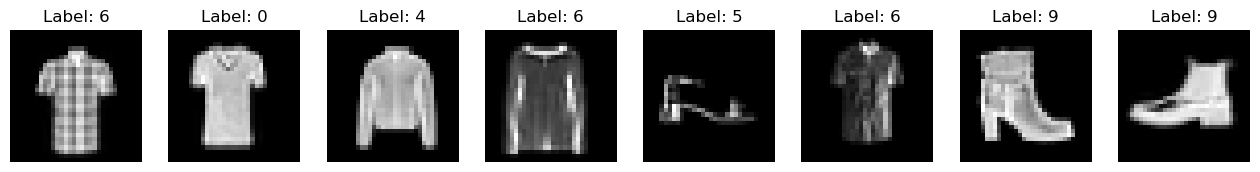

In [121]:
def plotImages(dataframe, numImages=8):
    sample = dataframe.sample(n=numImages)
    fig, axes = plt.subplots(1, numImages, figsize=(16, 16))
    
    for i, (index, row) in enumerate(sample.iterrows()):
        image = row[:-1].values.reshape(32, 32)
        label = row['label']
        
        ax = axes[i]
        ax.imshow(image, cmap='gray', interpolation='nearest')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.show()

plotImages(dfTrain)

#### Rozdělení obrázků po třídách
* Z grafu je patrné, že dataset je z pohledu výskytu různých tříd skoro vyvážený

In [122]:
unique, counts = np.unique(dfTrain['label'], return_counts=True)
unique = unique.astype(str) 
print(unique)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


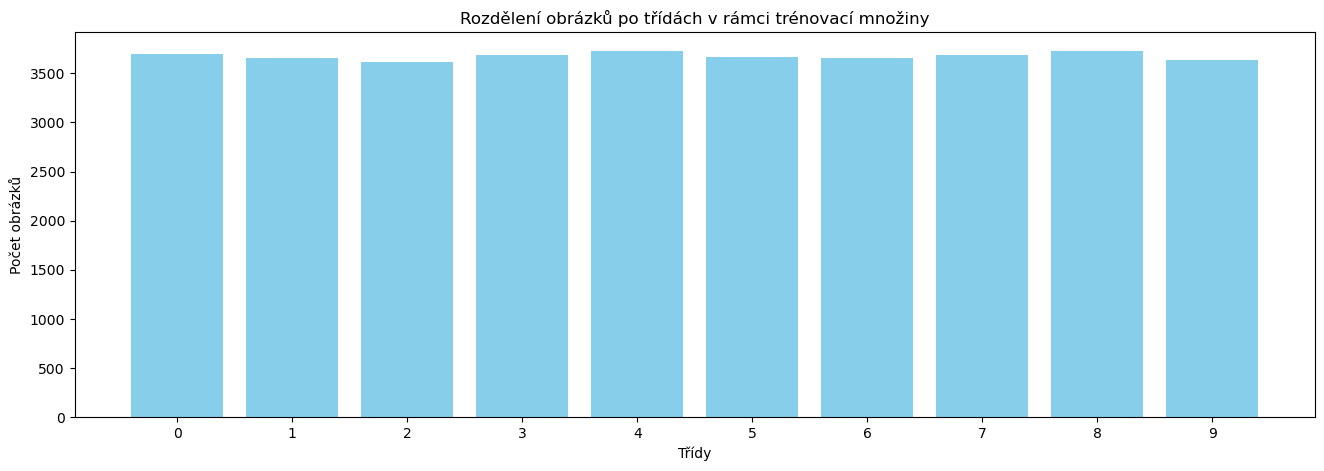

In [124]:
fig = plt.figure(figsize = (16, 5))
 
plt.bar(unique, counts, color ='skyblue')
 
plt.xlabel("Třídy")
plt.ylabel("Počet obrázků")
plt.title("Rozdělení obrázků po třídách v rámci trénovací množiny")
plt.show()

#### Histogram intenzit pixelů
* Z histogramu intenzit pixelů plyne, že drtivá většina pixelů je skoro černá

/home/motlpetr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/motlpetr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


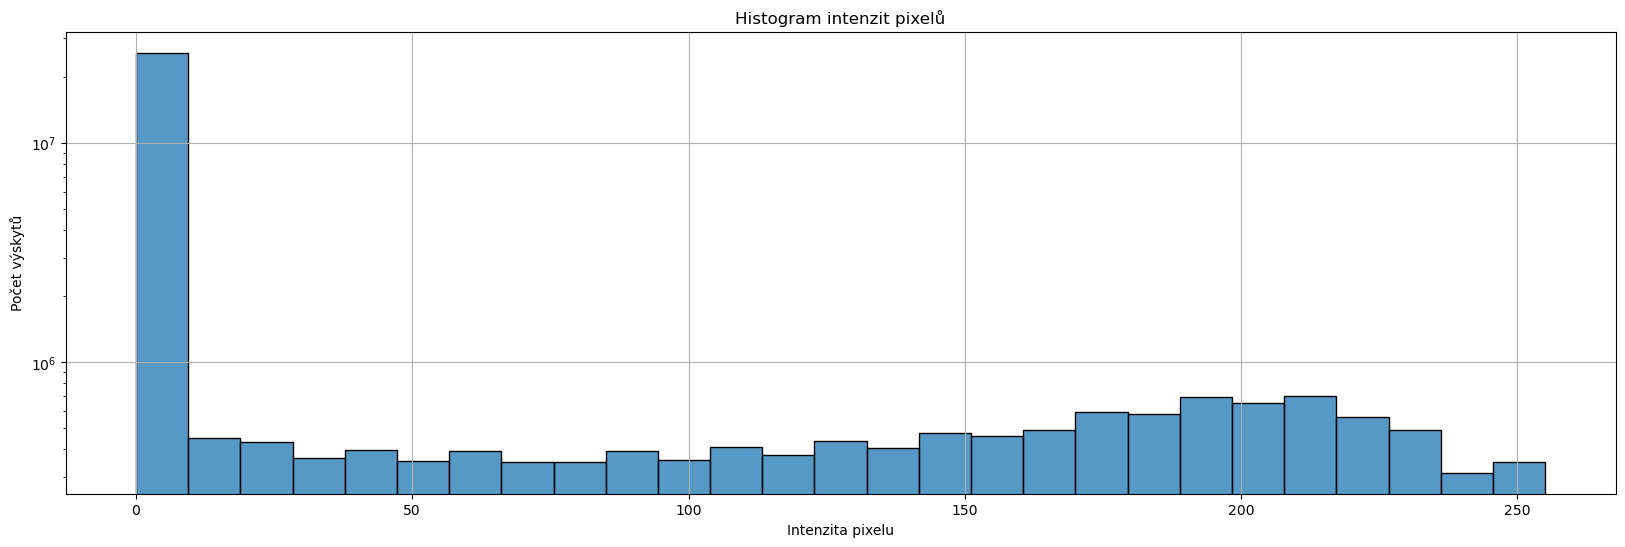

In [125]:
pixels = dfTrain.drop('label', axis=1).to_numpy().flatten()

plt.figure(figsize=(20, 6))
ax = sns.histplot(pixels,log_scale=(False, True), bins='sturges')

plt.title('Histogram intenzit pixelů')
plt.xlabel('Intenzita pixelu')
plt.ylabel('Počet výskytů')
plt.grid(True)
plt.show()

#### Základní statistiky

In [126]:
pixels = dfTrain.drop('label', axis=1)

In [127]:
# Získání průměru přes všechny pixely
mean_pixel_value = round(pixels.mean().mean(), 3)

# Směrodatná odchylka
std_pixel_value = round(pixels.std().mean(),3)

# Minimum přes všechny pixely
min_pixel_value = pixels.min().min()  

# Maximum přes všechny pixely
max_pixel_value = pixels.max().max()

print(f"Průměrná hodnota pixelu: {mean_pixel_value}")
print(f"Průměrná směrodatná odchylka pixelů: {std_pixel_value}")
print(f"Minimální hodnota pixelu: {min_pixel_value}")
print(f"Maximální hodnota pixelu: {max_pixel_value}")

Průměrná hodnota pixelu: 44.753
Průměrná směrodatná odchylka pixelů: 45.209
Minimální hodnota pixelu: 0
Maximální hodnota pixelu: 255


* Zkusme zprůměrovat hodnoty jednotlivých pixelů obrázků podle příslušnosti ke třídě a vykreslit si průměrný obrázek každé třídy
* Z vykreslených obrázků jsou patrné rysy charakteristické pro jednotlivé třídy

In [128]:
def showAverageImgs(train, labels):
    fig, axes = plt.subplots(4, 3, figsize=(10, 10))
    
    for label in labels:
        labelimgs = train[train.label == label]
        labelimgs = labelimgs.drop(columns=['label'])
    
        meanImageLabel = np.mean(labelimgs.to_numpy(), axis=0)
        meanImageLabel = meanImageLabel.reshape(32, 32)
        row = label // 3
        col = label % 3
        ax = axes[row, col]
        ax.imshow(meanImageLabel, cmap='gray')
        ax.set_title(f'Průměrný obrázek třídy {label}')
        ax.axis('off')

    for i in range(len(labels), 12):
        row = i // 3
        col = i % 3
        axes[row, col].axis('off')
        
    plt.tight_layout()
    plt.show()

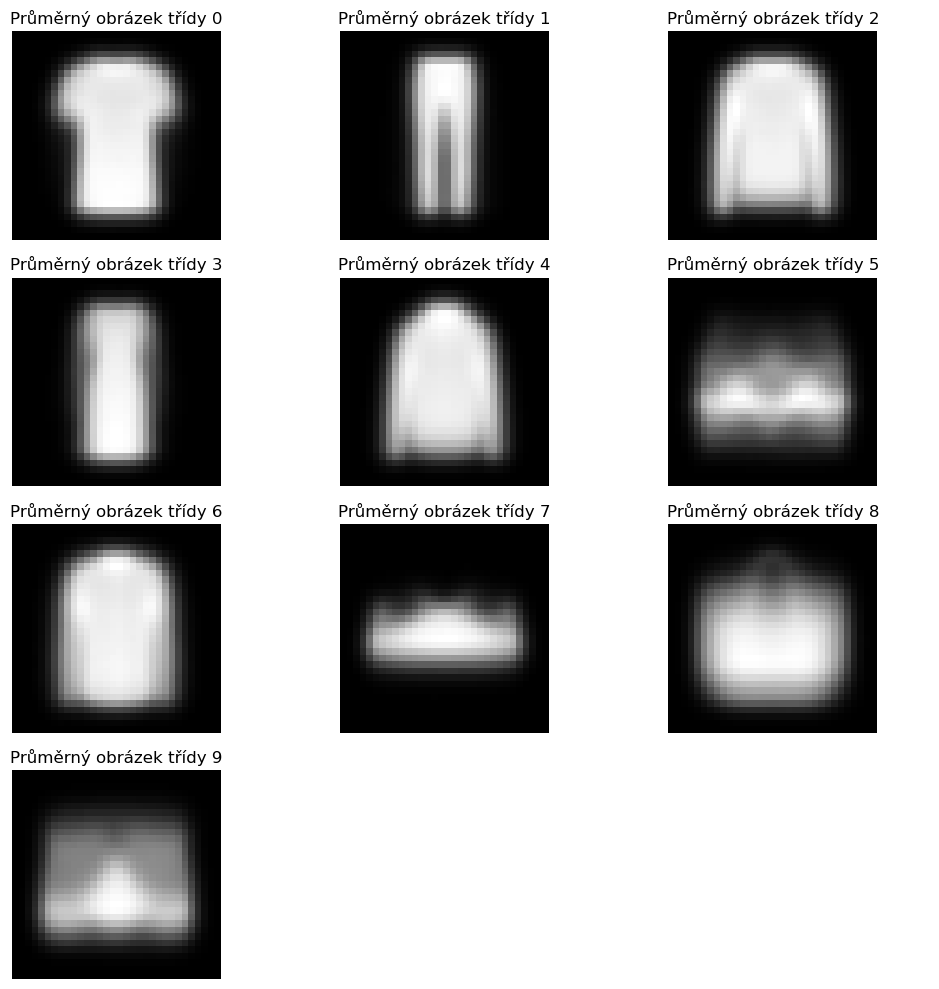

In [129]:
unique = np.unique(dfTrain['label'])
showAverageImgs(dfTrain, unique)

### Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě
* Myslím, že dopředné neuronové sítě mohou být účinné pro klasifikaci obrázků do více tříd, ale mohou mít omezení ve schopnosti zpracovat některé obrazové vzory

In [130]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


#### Experimentujte s různými hloubkami a velikostmi vrstev
* Vytvořme si třídu pro naši dopřednou neuronovou síť pro experimentování s různými hloubkami a velikostmi vrstev

In [131]:
class CustomNet(nn.Module):
    def __init__(self, layers_sizes):
        super().__init__()
        layers = []
        input_size = 32*32

        for size in layers_sizes:
            layers.append(nn.Linear(input_size, size))
            layers.append(nn.ReLU())
            input_size = size

        layers.append(nn.Linear(input_size, 10))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = self.layers(x)
        return x

* Definujme si modely s různými počty a velikostí vrstev a aby se nám s nimi dobře pracovalo, tak si je i pojmenujme

In [132]:
model_configurations = [
    {"name": "Two_Layer_Wide", "config": [1024, 512]},
    {"name": "Two_Layer_Wide_2", "config": [768, 384]},
    {"name": "Three_Layer_Moderate_1", "config": [1024, 512, 256]},
    {"name": "Three_Layer_Moderate_2", "config": [512, 512, 512]},
    {"name": "Four_Layer_Deep", "config": [256, 128, 64, 32]},
    {"name": "Four_Layer_Deep_2", "config": [512, 256, 128, 64]},
    {"name": "Five_Layer_Balanced", "config": [128, 128, 64, 32, 16]},
    {"name": "Five_Layer_Balanced_2", "config": [256, 128, 64, 32, 16]},
    {"name": "Three_Layer_Moderate_3", "config": [600, 300, 150]},
    {"name": "Three_Layer_Moderate_4", "config": [400, 200, 100]},
    {"name": "Four_Layer_Balanced", "config": [400, 200, 100, 50]},
    {"name": "Four_Layer_Balanced_2", "config": [800, 400, 200, 100]},
    {"name": "Five_Layer_Wide_Deep", "config": [1024, 512, 256, 128, 64]},
    {"name": "Five_Layer_Wide_Deep_2", "config": [512, 512, 256, 256, 128]},
    {"name": "Six_Layer_Complex", "config": [1024, 512, 512, 256, 128, 64]},
    {"name": "Six_Layer_Complex_2", "config": [800, 400, 400, 200, 100, 50]}
]

* Jako ztrátovou funkci použijme kategorickou relativní entropii

In [133]:
loss_fn = torch.nn.CrossEntropyLoss()

* Nejdříve budeme pracovat s daty, která nejsou normalizovaná ani standardizovaná

In [134]:
training_loader = loaders['basic']['train']
validation_loader = loaders['basic']['valid']
train_data = sets['basic']['train']
val_data = sets['basic']['valid']

* Funkce pro natrénování jedné epochy modelu

In [135]:
def train_one_epoch(model, loss_fn, optimizer, training_loader, train_data):
    model.train()

    correct = 0
    total = 0

    for inputs, labels in training_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy


* Připravme si ještě funkci, která umožňuje natrénování jedné epochy modelu s přidáním L1 regularizace

In [136]:
def train_one_epoch_lreg(model, loss_fn, optimizer, training_loader, train_data, l_alpha = 0.1):
    model.train()

    correct = 0
    total = 0

    for inputs, labels in training_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels)

        l_reg = torch.tensor(0.).to(device)
        l_reg += torch.linalg.vector_norm(model.fc.weight.flatten(),1)
        
        loss = loss + l_alpha*l_reg
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [137]:
total_batches = len(training_loader)
print(f"Total batches: {total_batches}")

Total batches: 575


* Funkce pro natrénování modelu přes daný počet epoch
* Pro trénování použijeme techniku early stopping

In [138]:
def trainModel(model, loss_fn, optimizer, training_loader, validation_loader, max_epochs, k_epochs, modelName, train_data, val_data, reg=False, l_alpha=0.1, save=True):
    MAX_EPOCHS = max_epochs

    K_EPOCHS = k_epochs

    epochs = []
    epochs_from_best = 0
    best_vacc = 0
    early_stop = False

    train_accuracies = []
    val_accuracies = []


    for epoch in range(MAX_EPOCHS):

        model.train(True)
        if reg:
            train_acc = train_one_epoch_lreg(model, loss_fn, optimizer, training_loader, train_data, l_alpha)
        else:
            train_acc = train_one_epoch(model, loss_fn, optimizer, training_loader, train_data)

        model.train(False)

        model.eval()
        vcorrect = 0
        for (vinputs, vlabels) in validation_loader:
            vinputs, vlabels = vinputs.to(device), vlabels.to(device)
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()

        vacc = vcorrect / len(val_data)

        epochs.append(epoch)
        val_accuracies.append(vacc.item())
        train_accuracies.append(train_acc)

        #print(f"TRAIN acc: {train_acc:.3f}, VALIDATION acc: {vacc:.3f}")

        if vacc > best_vacc:
            best_vacc = vacc
            if save:
                model_path = "saves/best_model_" + modelName + ".pt"
                torch.save(model.state_dict(), model_path)
            epochs_from_best = 0
        else:
            epochs_from_best += 1


        if epochs_from_best > K_EPOCHS:
            print('EPOCH {}:'.format(epoch + 1))
            print(f"BEST VALIDATION accuracy: {best_vacc:.3f}")
            print("Early stopping now")
            early_stop = True
            return (best_vacc, train_accuracies, val_accuracies)
            break

    if not early_stop:
        print(f"Trained on all {MAX_EPOCHS} epochs.")
        print(f"BEST VALIDATION accuracy: {best_vacc:.3f}")
        return (best_vacc, train_accuracies, val_accuracies)

* Funkce pro vykreslení grafu výkonnosti modelu

In [139]:
def plot_accuracies(train_acc, val_acc, modelName, ax):
    epochs = list(range(1, len(train_acc) + 1))

    ax.plot(epochs, train_acc, label='Train Accuracy', color='blue')
    ax.plot(epochs, val_acc, label='Validation Accuracy', color='green')

    best_val_epoch = val_acc.index(max(val_acc)) + 1
    best_val_acc = max(val_acc)
    ax.scatter(best_val_epoch, best_val_acc, color='red', s=100, label='Best Validation Acc', zorder=5)
    ax.annotate(f"{best_val_acc:.3f}%", (best_val_epoch, best_val_acc), textcoords="offset points", xytext=(0,10), ha='center')

    # Pro přehlednost vykreslíme na ose x pouze každou druhou epochu
    ax.set_xticks(epochs[::2])
    ax.set_xticklabels(epochs[::2])

    ax.set_title(modelName)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy (%)')
    ax.legend()
    ax.grid(True, alpha=0.5)

**Pojďme natrénovat naše definované modely a porovnejme, které z nich by mohly být užitečné**

**********************************************************************
Training model Two_Layer_Wide
**********************************************************************
EPOCH 31:
BEST VALIDATION accuracy: 0.840
Early stopping now
Total training time for Two_Layer_Wide: 40.97 seconds
**********************************************************************
Training model Two_Layer_Wide_2
**********************************************************************
EPOCH 31:
BEST VALIDATION accuracy: 0.843
Early stopping now
Total training time for Two_Layer_Wide_2: 37.87 seconds
**********************************************************************
Training model Three_Layer_Moderate_1
**********************************************************************
EPOCH 25:
BEST VALIDATION accuracy: 0.845
Early stopping now
Total training time for Three_Layer_Moderate_1: 34.09 seconds
**********************************************************************
Training model Three_Layer_Moderate_2
**********

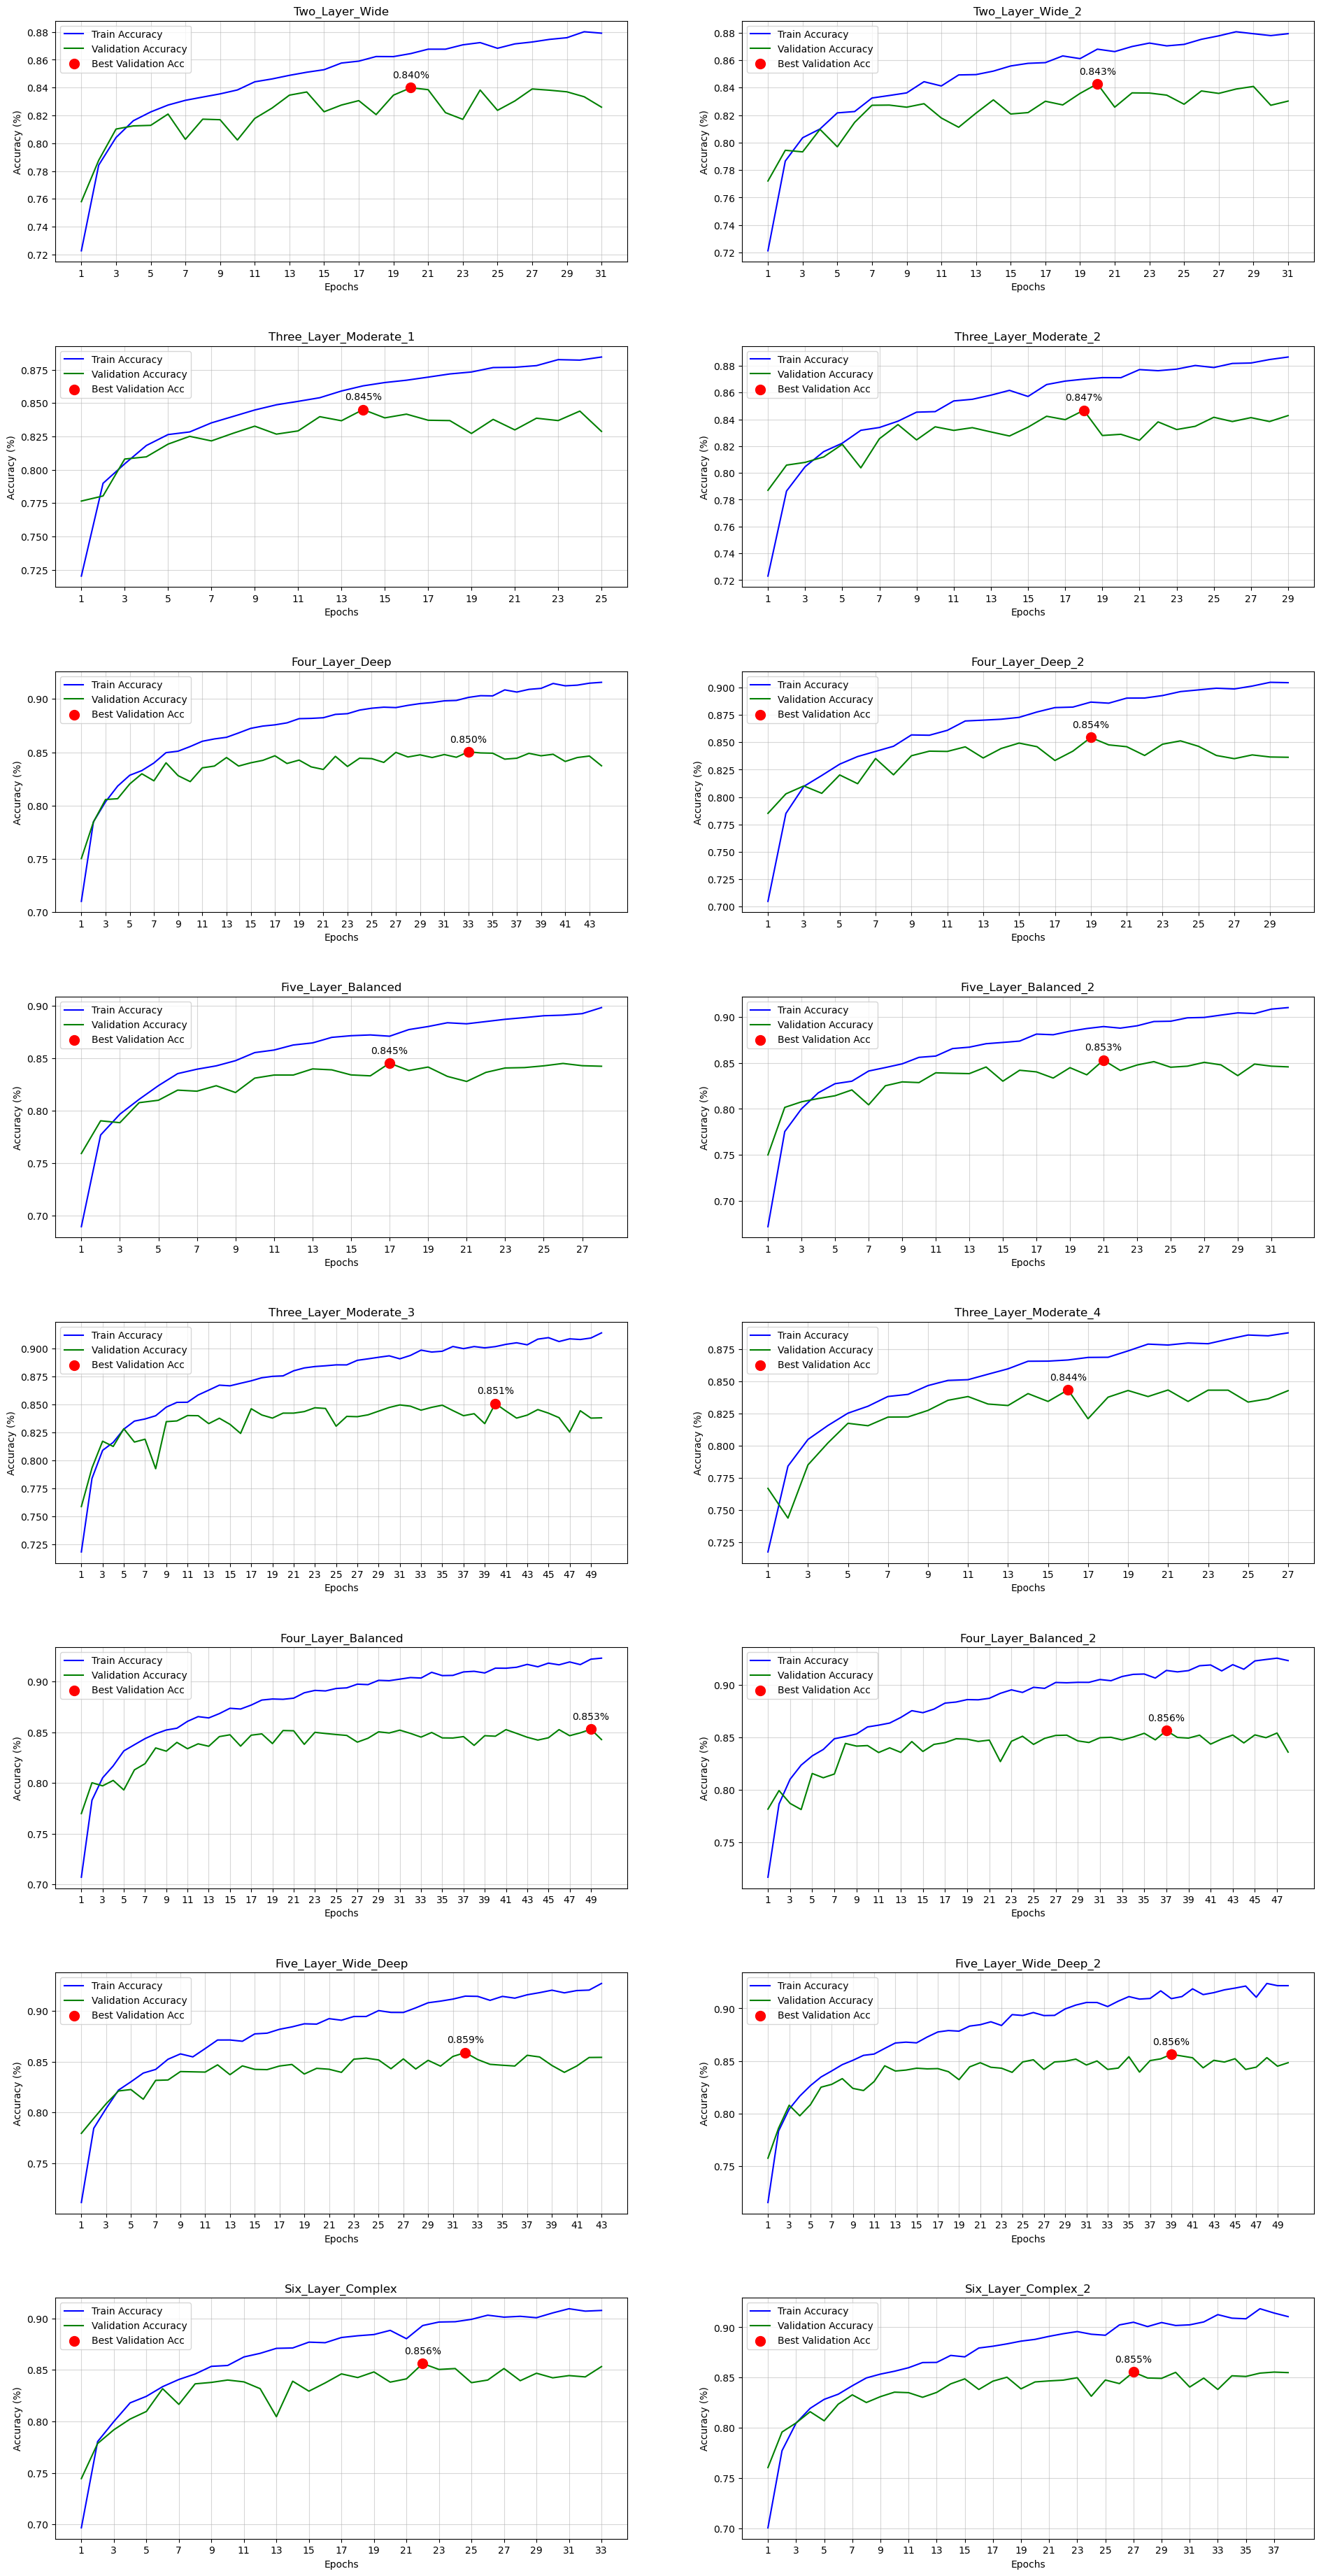

In [140]:
MAX_EPOCHS = 50
K_EPOCHS = 10

cols = 2
rows = np.ceil(16 / cols)
fig, axs = plt.subplots(int(rows), int(cols), figsize=(cols * 10, rows * 5))
axs = axs.flatten()

for idx, config in enumerate(model_configurations):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = CustomNet(config['config']).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    save_model_name = config['name']

    start_time = time()
    best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, training_loader, validation_loader,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data, val_data)
    total_training_time = time() - start_time
    plot_accuracies(train_acc, val_acc, config['name'], axs[idx])
    print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.35)

for i in range(idx + 1, len(axs)):
    axs[i].axis('off')

plt.show()

* Zvolme si z výše uvedených modelů 7 nejlepších dle validační přesnosti pro další experimentování

In [145]:
model_configurations2 = [
    {"name": "Four_Layer_Deep_2", "config": [512, 256, 128, 64]},
    {"name": "Four_Layer_Balanced", "config": [400, 200, 100, 50]},
    {"name": "Four_Layer_Balanced_2", "config": [800, 400, 200, 100]},
    {"name": "Five_Layer_Wide_Deep", "config": [1024, 512, 256, 128, 64]},
    {"name": "Five_Layer_Wide_Deep_2", "config": [512, 512, 256, 256, 128]},
    {"name": "Six_Layer_Complex", "config": [1024, 512, 512, 256, 128, 64]},
    {"name": "Six_Layer_Complex_2", "config": [800, 400, 400, 200, 100, 50]}
]

#### Experimentujte se standardizací/normalizací dat
* Zkusme nyní modely natrénovat na standardizovaných a normalizovaných datech

In [146]:
train_loader_norm = loaders['normalized']['train']
valid_loader_norm = loaders['normalized']['valid']

train_data_norm = sets['normalized']['train']
val_data_norm = sets['normalized']['valid']

In [147]:
train_loader_stand = loaders['standardized']['train']
valid_loader_stand = loaders['standardized']['valid']

train_data_stand = sets['standardized']['train']
val_data_stand = sets['standardized']['valid']

**Normalizovaná data**

**********************************************************************
Training model Four_Layer_Deep_2
**********************************************************************
EPOCH 29:
BEST VALIDATION accuracy: 0.868
Early stopping now
Total training time for Four_Layer_Deep_2: 38.79 seconds
**********************************************************************
Training model Four_Layer_Balanced
**********************************************************************
EPOCH 31:
BEST VALIDATION accuracy: 0.866
Early stopping now
Total training time for Four_Layer_Balanced: 40.55 seconds
**********************************************************************
Training model Four_Layer_Balanced_2
**********************************************************************
EPOCH 35:
BEST VALIDATION accuracy: 0.866
Early stopping now
Total training time for Four_Layer_Balanced_2: 49.00 seconds
**********************************************************************
Training model Five_Layer_Wide_Deep
**

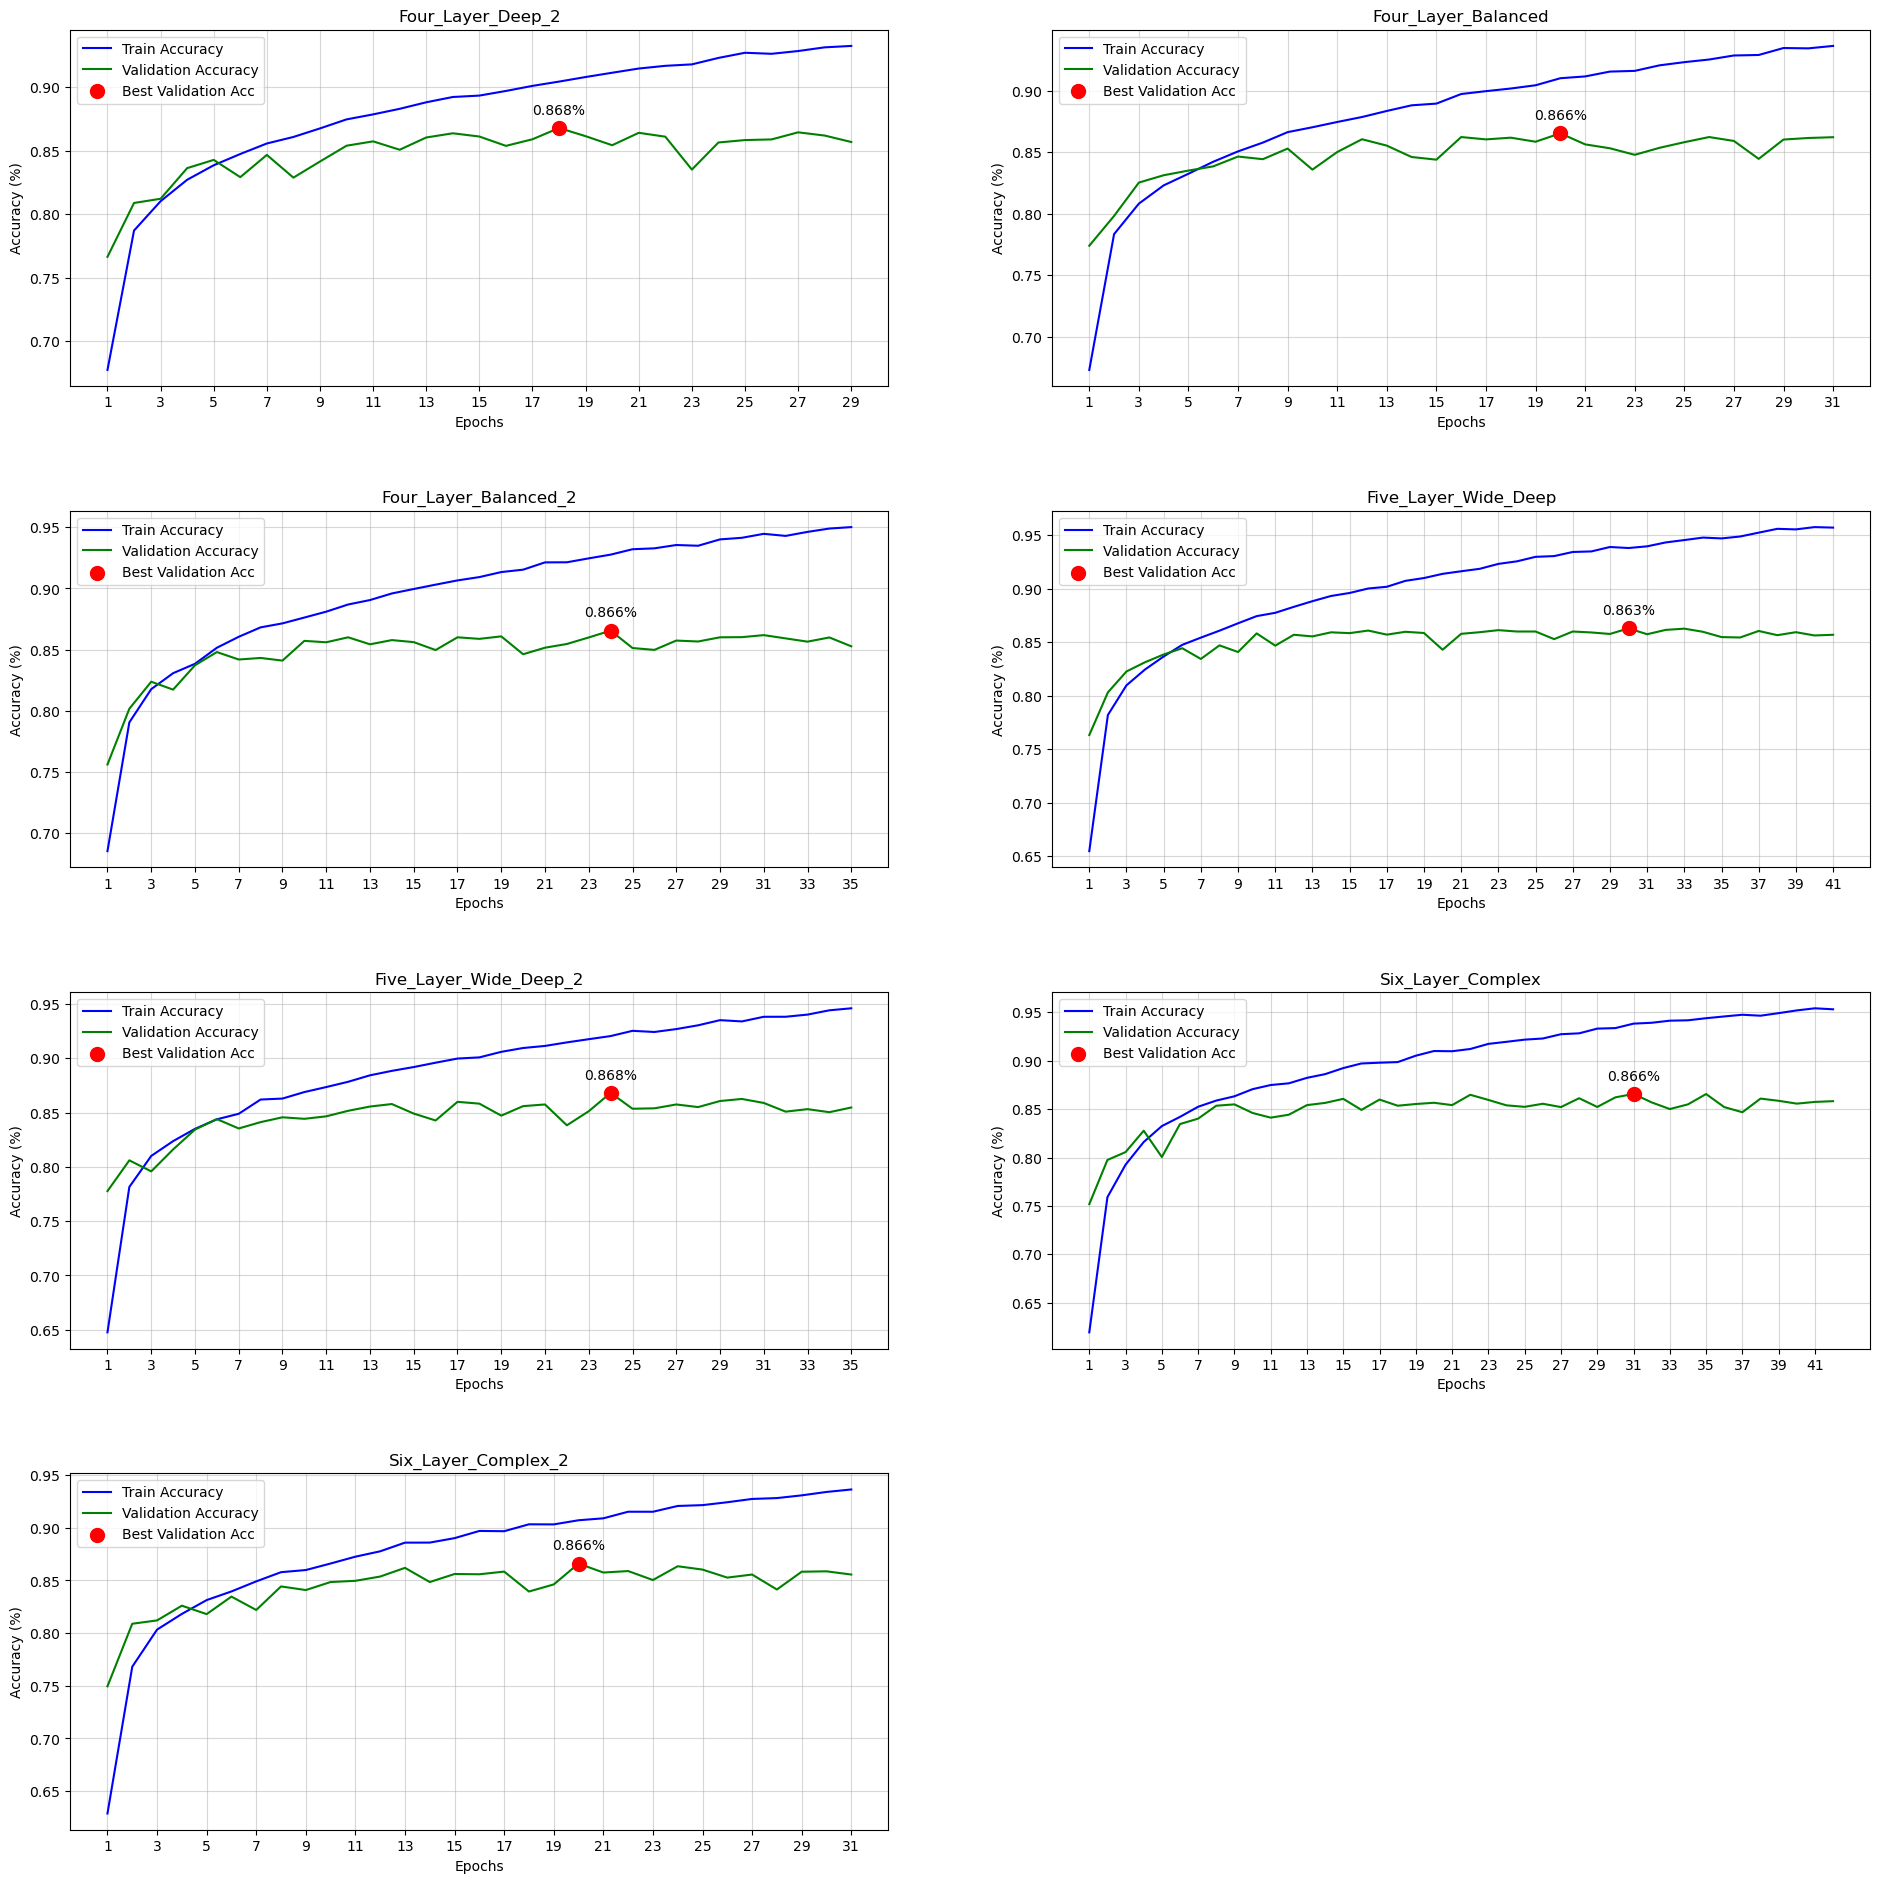

In [148]:
MAX_EPOCHS = 50
K_EPOCHS = 10

cols = 2
rows = np.ceil(7 / cols)
fig, axs = plt.subplots(int(rows), int(cols), figsize=(cols * 10, rows * 5))
axs = axs.flatten()

for idx, config in enumerate(model_configurations2):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = CustomNet(config['config']).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    save_model_name = config['name'] + "_norm"

    start_time = time()
    best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, train_loader_norm, valid_loader_norm,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data_norm, val_data_norm)
    total_training_time = time() - start_time
    plot_accuracies(train_acc, val_acc, config['name'], axs[idx])
    print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.35)

for i in range(idx + 1, len(axs)):
    axs[i].axis('off')

plt.show()

* Vidíme, že normalizace dat trochu pomohla

**Standardizace**

**********************************************************************
Training model Four_Layer_Deep_2
**********************************************************************
EPOCH 37:
BEST VALIDATION accuracy: 0.854
Early stopping now
Total training time for Four_Layer_Deep_2: 49.31 seconds
**********************************************************************
Training model Four_Layer_Balanced
**********************************************************************
EPOCH 34:
BEST VALIDATION accuracy: 0.856
Early stopping now
Total training time for Four_Layer_Balanced: 44.19 seconds
**********************************************************************
Training model Four_Layer_Balanced_2
**********************************************************************
EPOCH 22:
BEST VALIDATION accuracy: 0.854
Early stopping now
Total training time for Four_Layer_Balanced_2: 30.67 seconds
**********************************************************************
Training model Five_Layer_Wide_Deep
**

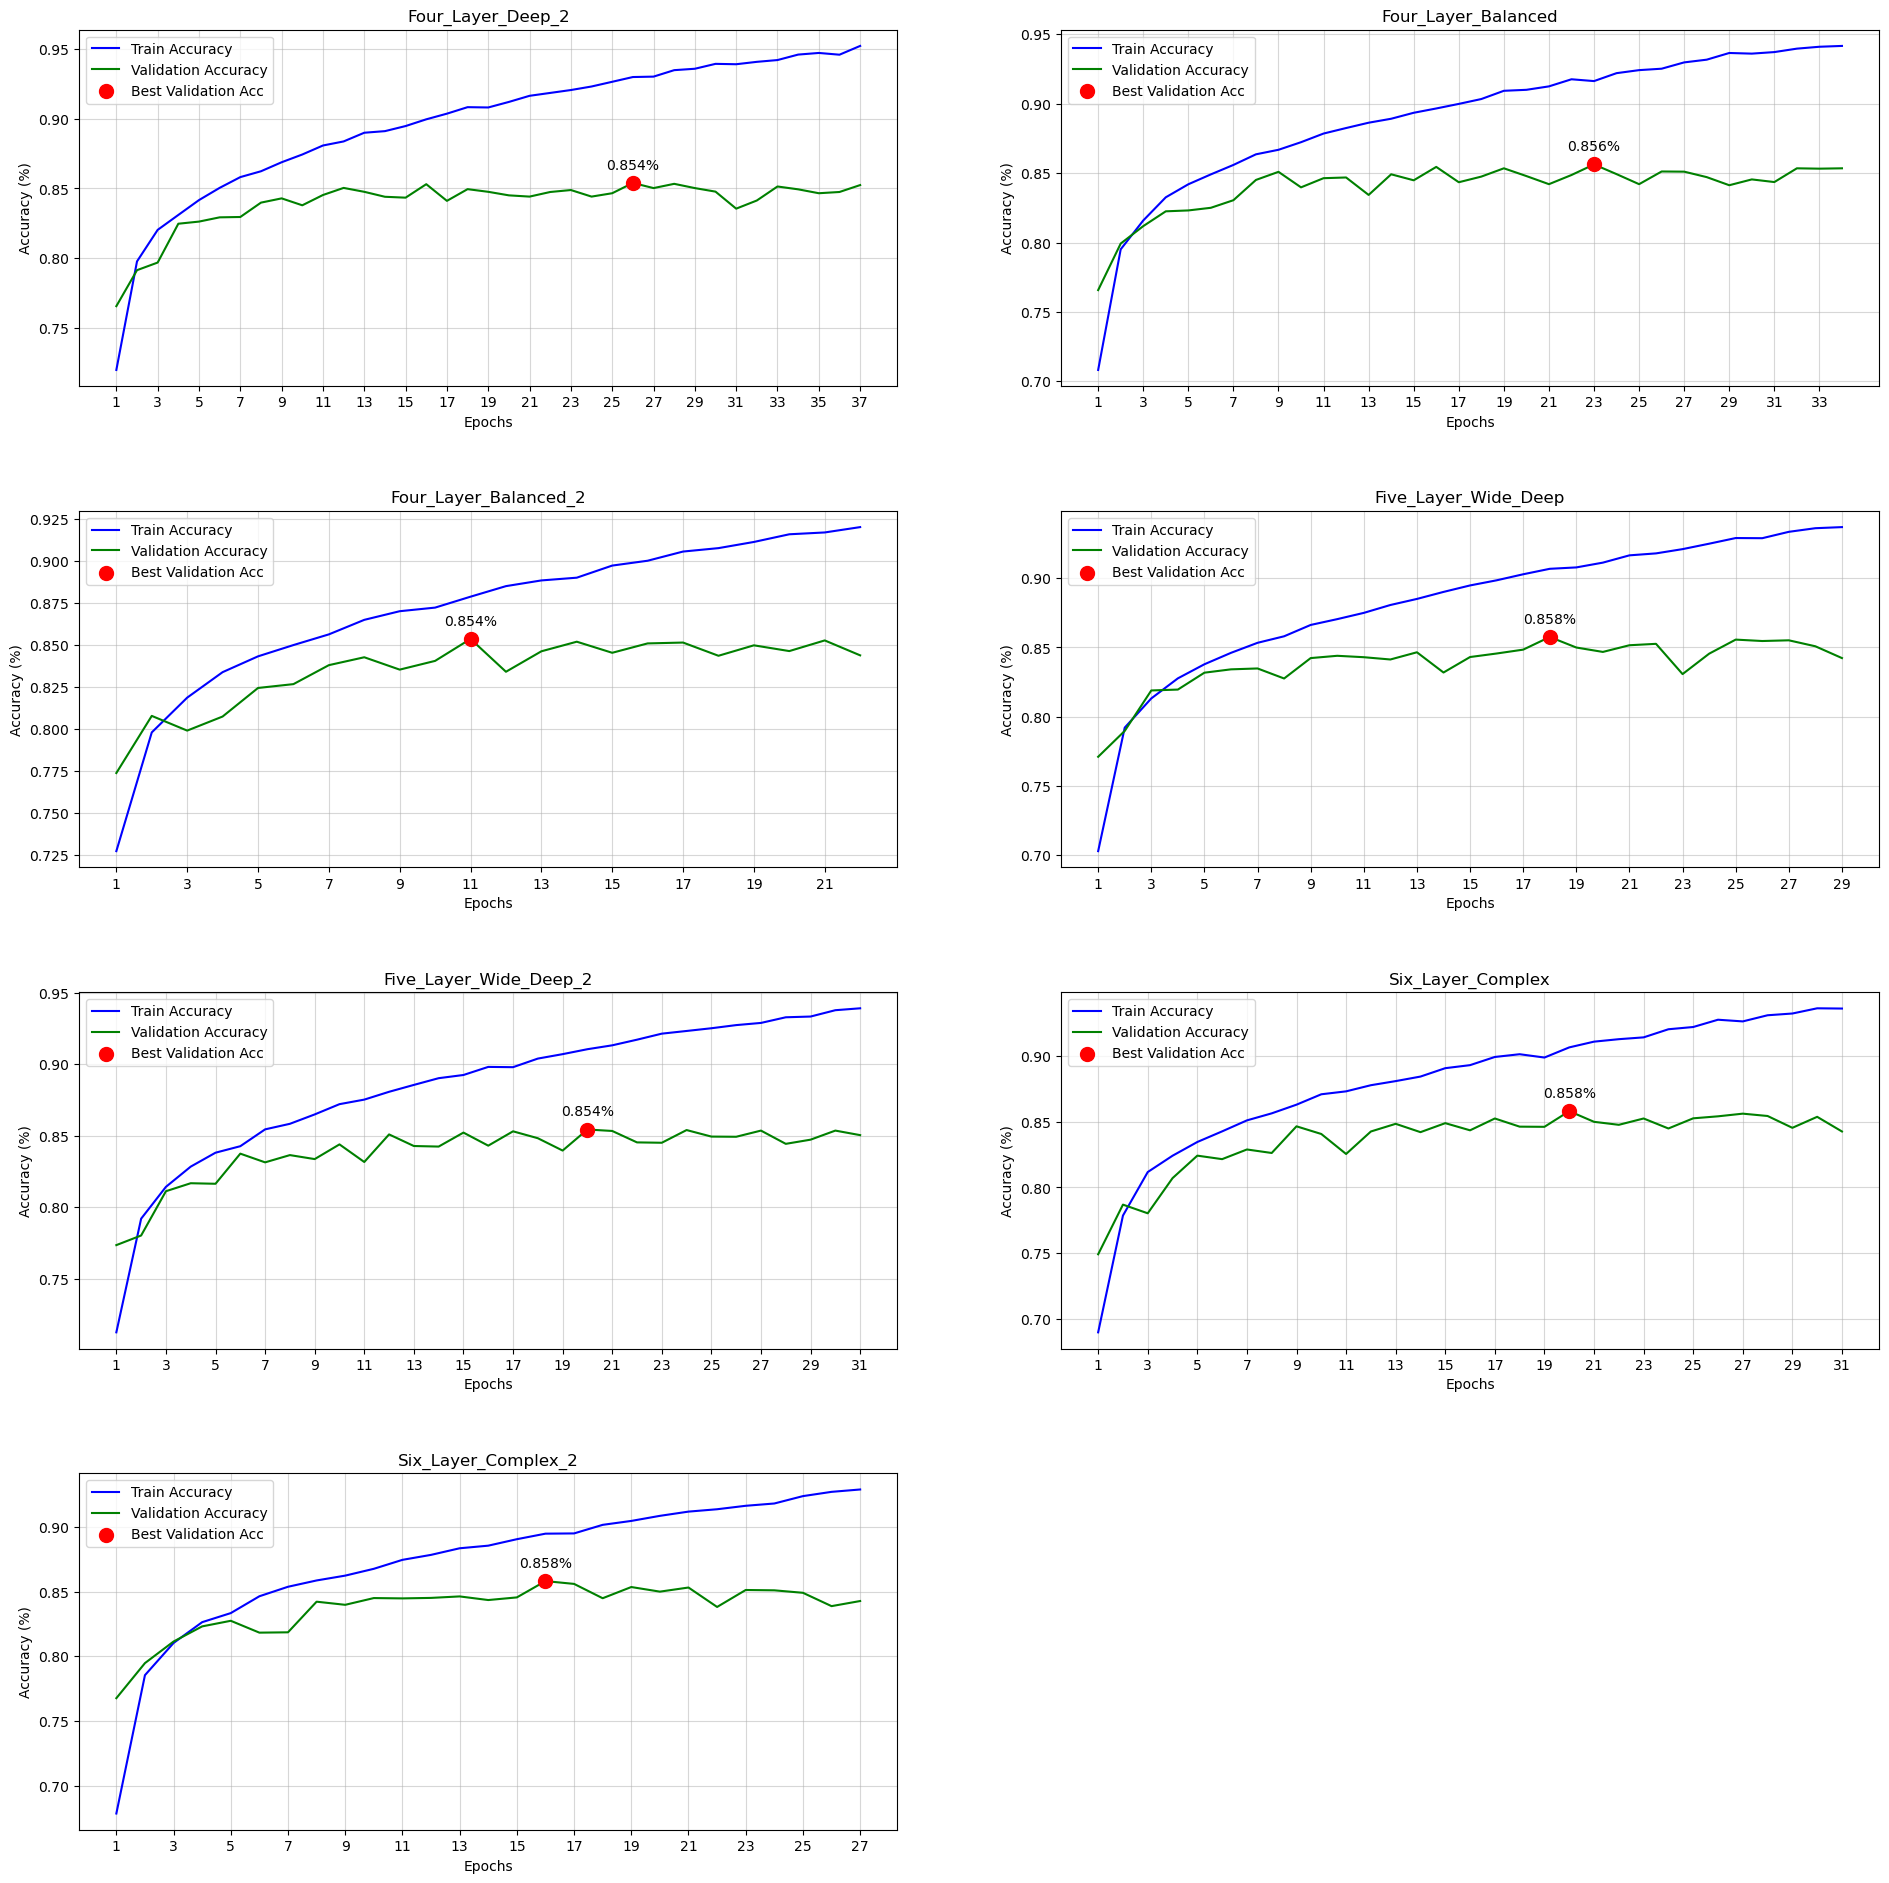

In [149]:
MAX_EPOCHS = 50
K_EPOCHS = 10

cols = 2
rows = np.ceil(7 / cols)
fig, axs = plt.subplots(int(rows), int(cols), figsize=(cols * 10, rows * 5))
axs = axs.flatten()

for idx, config in enumerate(model_configurations2):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = CustomNet(config['config']).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    save_model_name = config['name'] + "_stand"

    start_time = time()
    best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, train_loader_stand, valid_loader_stand,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data_stand, val_data_stand)
    total_training_time = time() - start_time
    plot_accuracies(train_acc, val_acc, config['name'], axs[idx])
    print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.35)

for i in range(idx + 1, len(axs)):
    axs[i].axis('off')

plt.show()

* Standardizace některým modelům také nepatrně pomohla

#### Experimentujte s různými optimalizačními metodami
* Vyzkoušejme pro naše modely níže definované optimizery z knihovny PyTorch a pokusme se zjistit, které z nich jsou nejlepší

In [150]:
MAX_EPOCHS = 30
K_EPOCHS = 5

for idx, config in enumerate(model_configurations2):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = CustomNet(config['config']).to(device)

    optimizers = {
    'Adam': torch.optim.Adam(model.parameters()),
    'AdamW': torch.optim.AdamW(model.parameters()),
    'Adamax': torch.optim.Adamax(model.parameters()),
    'NAdam': torch.optim.NAdam(model.parameters()),
    'RAdam': torch.optim.RAdam(model.parameters()),
    'RMSprop': torch.optim.RMSprop(model.parameters()),
    'SGD': torch.optim.SGD(model.parameters()),
    }

    for name in optimizers:
        print(f'USING {name} optimizer')
        optimizer = optimizers[name]

        save_model_name = config['name'] + '_' + name

        start_time = time()
        trainModel(model, loss_fn, optimizer, training_loader, validation_loader, MAX_EPOCHS, K_EPOCHS, save_model_name, train_data, val_data)
        total_training_time = time() - start_time
        print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

**********************************************************************
Training model Four_Layer_Deep_2
**********************************************************************
USING Adam optimizer
EPOCH 21:
BEST VALIDATION accuracy: 0.851
Early stopping now
Total training time for Four_Layer_Deep_2: 28.13 seconds
USING AdamW optimizer
EPOCH 11:
BEST VALIDATION accuracy: 0.851
Early stopping now
Total training time for Four_Layer_Deep_2: 14.89 seconds
USING Adamax optimizer
EPOCH 8:
BEST VALIDATION accuracy: 0.864
Early stopping now
Total training time for Four_Layer_Deep_2: 10.60 seconds
USING NAdam optimizer
EPOCH 16:
BEST VALIDATION accuracy: 0.846
Early stopping now
Total training time for Four_Layer_Deep_2: 22.05 seconds
USING RAdam optimizer
EPOCH 8:
BEST VALIDATION accuracy: 0.857
Early stopping now
Total training time for Four_Layer_Deep_2: 10.72 seconds
USING RMSprop optimizer
EPOCH 8:
BEST VALIDATION accuracy: 0.102
Early stopping now
Total training time for Four_Layer_Deep_2: 

* Z výsledků experimentování plyne, že nám nejlépe vychází tyto optimalizační algoritmy:
    * Adam, AdamW, Adamax, RAdam, NAdam

#### Experimentujte s různými regularizačními technikami
* Vyzkoušejme Dropout, L1 regularizaci a L2 regularizaci
* Vytvořme si třídu, která před výstupní vrstvu přidá dropout

In [151]:
class CustomNetDropout(nn.Module):
    def __init__(self, layers_sizes, dropout_rate=0.5):
        super().__init__()
        self.layers = nn.ModuleList()
        input_size = 32*32

        for size in layers_sizes:
            self.layers.append(nn.Linear(input_size, size))
            self.layers.append(nn.ReLU())
            input_size = size

        self.layers.append(nn.Dropout(dropout_rate))
        self.fc = nn.Linear(input_size, 10)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        for layer in self.layers:
            x = layer(x)
        x = self.fc(x)
        return x

* Zkusme aplikovat různé varianty dropoutu spolu s L1 a L2 regularizací

In [152]:
MAX_EPOCHS = 25
K_EPOCHS = 5

dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for idx, config in enumerate(model_configurations2):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    for dropout in dropouts:
        print(f'USING {dropout} droupout rate')
        model = CustomNetDropout(config['config'], dropout).to(device)
        optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-3)

        save_model_name = config['name'] + '_' + str(dropout)

        start_time = time()
        best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, training_loader, validation_loader,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data, val_data, True)
        total_training_time = time() - start_time
        print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

**********************************************************************
Training model Four_Layer_Deep_2
**********************************************************************
USING 0.1 droupout rate
Trained on all 25 epochs.
BEST VALIDATION accuracy: 0.839
Total training time for Four_Layer_Deep_2: 36.33 seconds
USING 0.2 droupout rate
EPOCH 25:
BEST VALIDATION accuracy: 0.841
Early stopping now
Total training time for Four_Layer_Deep_2: 36.54 seconds
USING 0.3 droupout rate
EPOCH 12:
BEST VALIDATION accuracy: 0.821
Early stopping now
Total training time for Four_Layer_Deep_2: 17.38 seconds
USING 0.4 droupout rate
EPOCH 18:
BEST VALIDATION accuracy: 0.826
Early stopping now
Total training time for Four_Layer_Deep_2: 26.28 seconds
USING 0.5 droupout rate
Trained on all 25 epochs.
BEST VALIDATION accuracy: 0.835
Total training time for Four_Layer_Deep_2: 36.36 seconds
USING 0.6 droupout rate
Trained on all 25 epochs.
BEST VALIDATION accuracy: 0.832
Total training time for Four_Layer_Deep

* Nevypadá to, že by tato kombinace regularizačních technik měla nějaký pozitivní vliv na výkonnost modelů

#### Kombinace všeho pro výběr nejlepšího modelu dopředné sítě pomocí knihovny Optuna
* Pomocí výsledků přechozích experimentů redukujme počet hyperparametrů a zkusme je doladit pomocí knihovny Optuna

In [192]:
def objective(trial):
    config_index = trial.suggest_int('config_index', 0, len(model_configurations2) - 1)
    model_config = model_configurations2[config_index]

    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.7)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'NAdam', 'AdamW', 'Adamax', 'RAdam'])
    dataset_type = trial.suggest_categorical('dataset_type', ['basic', 'normalized', 'standardized'])

    l1_lambda = trial.suggest_float('l1_lambda', 0, 1e-3)
    l2_lambda = trial.suggest_float('l2_lambda', 0, 1e-3)

    model = CustomNetDropout(model_config['config'], dropout_rate)
    model.to(device)

    optimizer = getattr(optim, optimizer_name)(model.parameters(), weight_decay=l2_lambda)

    train_loader = loaders[dataset_type]['train']
    valid_loader = loaders[dataset_type]['valid']

    train_data = sets[dataset_type]['train']
    val_data = sets[dataset_type]['valid']

    criterion = nn.CrossEntropyLoss()

    accuracies = trainModel(model, loss_fn, optimizer, train_loader, valid_loader, 
                                      35, 10, model_config['name'], train_data, val_data, reg=True, l_alpha=l1_lambda, save=False)

    return accuracies[0]

In [193]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=70)
print("Best trial:")
trial = study.best_trial
print(" Value: ", trial.value)
print(" Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-05-06 13:23:32,319] A new study created in memory with name: no-name-4c700603-bfd9-4714-bc16-527c52dab40c
[I 2024-05-06 13:24:15,526] Trial 0 finished with value: 0.8407618999481201 and parameters: {'config_index': 0, 'dropout_rate': 0.4005847076511216, 'optimizer': 'Adam', 'dataset_type': 'basic', 'l1_lambda': 0.0005528890688742039, 'l2_lambda': 0.00040825328752136503}. Best is trial 0 with value: 0.8407618999481201.


EPOCH 29:
BEST VALIDATION accuracy: 0.841
Early stopping now


[I 2024-05-06 13:25:13,202] Trial 1 finished with value: 0.8506667017936707 and parameters: {'config_index': 4, 'dropout_rate': 0.041127935246715694, 'optimizer': 'RAdam', 'dataset_type': 'basic', 'l1_lambda': 0.0004803134009988136, 'l2_lambda': 0.0004941134710324581}. Best is trial 1 with value: 0.8506667017936707.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.851


[I 2024-05-06 13:26:08,712] Trial 2 finished with value: 0.8469841480255127 and parameters: {'config_index': 5, 'dropout_rate': 0.2298849246115265, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0009100328535707462, 'l2_lambda': 0.0008257151462302157}. Best is trial 1 with value: 0.8506667017936707.


EPOCH 28:
BEST VALIDATION accuracy: 0.847
Early stopping now


[I 2024-05-06 13:27:08,198] Trial 3 finished with value: 0.8568888902664185 and parameters: {'config_index': 3, 'dropout_rate': 0.03753714935652893, 'optimizer': 'Adam', 'dataset_type': 'standardized', 'l1_lambda': 3.306381902158362e-05, 'l2_lambda': 7.162432151094688e-05}. Best is trial 3 with value: 0.8568888902664185.


EPOCH 32:
BEST VALIDATION accuracy: 0.857
Early stopping now


[I 2024-05-06 13:28:15,407] Trial 4 finished with value: 0.8413968682289124 and parameters: {'config_index': 6, 'dropout_rate': 0.6587640218975863, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 0.00028354954141724466, 'l2_lambda': 0.0008550910757726035}. Best is trial 3 with value: 0.8568888902664185.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.841


[I 2024-05-06 13:29:24,333] Trial 5 finished with value: 0.8530793786048889 and parameters: {'config_index': 6, 'dropout_rate': 0.052014875467620875, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 6.445508254472587e-05, 'l2_lambda': 0.0009543234397987162}. Best is trial 3 with value: 0.8568888902664185.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.853


[I 2024-05-06 13:30:18,831] Trial 6 finished with value: 0.8594285845756531 and parameters: {'config_index': 4, 'dropout_rate': 0.18386202747032432, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0003088159478457685, 'l2_lambda': 0.0005443680742931062}. Best is trial 6 with value: 0.8594285845756531.


EPOCH 32:
BEST VALIDATION accuracy: 0.859
Early stopping now


[I 2024-05-06 13:31:27,708] Trial 7 finished with value: 0.8452063798904419 and parameters: {'config_index': 6, 'dropout_rate': 0.39004030234981396, 'optimizer': 'NAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.000289366065605862, 'l2_lambda': 0.00040839602825197}. Best is trial 6 with value: 0.8594285845756531.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.845


[I 2024-05-06 13:32:14,256] Trial 8 finished with value: 0.8519365191459656 and parameters: {'config_index': 6, 'dropout_rate': 0.29351479959395826, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0009978186016088935, 'l2_lambda': 0.0002036256089446409}. Best is trial 6 with value: 0.8594285845756531.


EPOCH 25:
BEST VALIDATION accuracy: 0.852
Early stopping now


[I 2024-05-06 13:33:12,262] Trial 9 finished with value: 0.8605714440345764 and parameters: {'config_index': 4, 'dropout_rate': 0.683440946446965, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.000714967690733893, 'l2_lambda': 0.0006758209661897862}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.861


[I 2024-05-06 13:33:59,903] Trial 10 finished with value: 0.8571428656578064 and parameters: {'config_index': 2, 'dropout_rate': 0.6377753735443797, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0007562269331373898, 'l2_lambda': 0.0006417733674415248}. Best is trial 9 with value: 0.8605714440345764.


EPOCH 31:
BEST VALIDATION accuracy: 0.857
Early stopping now


[I 2024-05-06 13:34:58,877] Trial 11 finished with value: 0.8575238585472107 and parameters: {'config_index': 3, 'dropout_rate': 0.5192433516282203, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.000602257918004256, 'l2_lambda': 0.0006608243844205127}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.858


[I 2024-05-06 13:35:53,747] Trial 12 finished with value: 0.8600634932518005 and parameters: {'config_index': 4, 'dropout_rate': 0.19042334234038716, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0003600727326197159, 'l2_lambda': 0.0007077105537259252}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.860


[I 2024-05-06 13:36:43,233] Trial 13 finished with value: 0.8539682626724243 and parameters: {'config_index': 1, 'dropout_rate': 0.5052442535326265, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0007126023201839356, 'l2_lambda': 0.0007447647518881655}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.854


[I 2024-05-06 13:37:41,014] Trial 14 finished with value: 0.8339048027992249 and parameters: {'config_index': 4, 'dropout_rate': 0.15341214791832464, 'optimizer': 'NAdam', 'dataset_type': 'basic', 'l1_lambda': 0.0004185374121725437, 'l2_lambda': 0.0009891729567559964}. Best is trial 9 with value: 0.8605714440345764.


EPOCH 34:
BEST VALIDATION accuracy: 0.834
Early stopping now


[I 2024-05-06 13:38:36,651] Trial 15 finished with value: 0.8472381234169006 and parameters: {'config_index': 2, 'dropout_rate': 0.5145275197792766, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 0.0007469214018469173, 'l2_lambda': 0.0006604401272118127}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.847


[I 2024-05-06 13:39:42,015] Trial 16 finished with value: 0.8601905107498169 and parameters: {'config_index': 5, 'dropout_rate': 0.3088679563979756, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.00019094503936727396, 'l2_lambda': 0.0002617479003665132}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.860


[I 2024-05-06 13:40:48,990] Trial 17 finished with value: 0.8584127426147461 and parameters: {'config_index': 5, 'dropout_rate': 0.3142353033995562, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 9.495223596416472e-05, 'l2_lambda': 0.0002541979256892065}. Best is trial 9 with value: 0.8605714440345764.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.858


[I 2024-05-06 13:41:56,454] Trial 18 finished with value: 0.8610793948173523 and parameters: {'config_index': 5, 'dropout_rate': 0.464998579054876, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.00018386093303496344, 'l2_lambda': 0.000260438642918191}. Best is trial 18 with value: 0.8610793948173523.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.861


[I 2024-05-06 13:42:59,567] Trial 19 finished with value: 0.8509206771850586 and parameters: {'config_index': 3, 'dropout_rate': 0.5869854989987577, 'optimizer': 'Adam', 'dataset_type': 'basic', 'l1_lambda': 0.0006363915555149277, 'l2_lambda': 1.2444208315843868e-07}. Best is trial 18 with value: 0.8610793948173523.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.851


[I 2024-05-06 13:44:10,270] Trial 20 finished with value: 0.826285719871521 and parameters: {'config_index': 5, 'dropout_rate': 0.6940518886792094, 'optimizer': 'NAdam', 'dataset_type': 'standardized', 'l1_lambda': 0.0008423982223134575, 'l2_lambda': 0.00036890573970713213}. Best is trial 18 with value: 0.8610793948173523.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.826


[I 2024-05-06 13:45:17,680] Trial 21 finished with value: 0.8634920716285706 and parameters: {'config_index': 5, 'dropout_rate': 0.42746276809177064, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0001984488090821076, 'l2_lambda': 0.00018579019407637267}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 13:46:09,904] Trial 22 finished with value: 0.8558730483055115 and parameters: {'config_index': 5, 'dropout_rate': 0.43894066384202957, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0001703594709440733, 'l2_lambda': 0.00013087075904756894}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 28:
BEST VALIDATION accuracy: 0.856
Early stopping now


[I 2024-05-06 13:46:47,456] Trial 23 finished with value: 0.8516825437545776 and parameters: {'config_index': 4, 'dropout_rate': 0.5774492767553444, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.000168547317809295, 'l2_lambda': 0.00032559894306829053}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 23:
BEST VALIDATION accuracy: 0.852
Early stopping now


[I 2024-05-06 13:47:51,921] Trial 24 finished with value: 0.8567619323730469 and parameters: {'config_index': 5, 'dropout_rate': 0.4384257282108061, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.00040944474239385464, 'l2_lambda': 0.0005315063998964219}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.857


[I 2024-05-06 13:48:51,281] Trial 25 finished with value: 0.8490158915519714 and parameters: {'config_index': 3, 'dropout_rate': 0.5808973262994298, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 3.5977973163185857e-06, 'l2_lambda': 0.00017015595702363234}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.849


[I 2024-05-06 13:49:41,641] Trial 26 finished with value: 0.8577777743339539 and parameters: {'config_index': 4, 'dropout_rate': 0.4609280769245112, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.00022158581147523458, 'l2_lambda': 9.79025144825548e-05}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 32:
BEST VALIDATION accuracy: 0.858
Early stopping now


[I 2024-05-06 13:50:32,601] Trial 27 finished with value: 0.8593016266822815 and parameters: {'config_index': 2, 'dropout_rate': 0.35826968196381037, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.000494621822361486, 'l2_lambda': 0.0004814349490001541}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 34:
BEST VALIDATION accuracy: 0.859
Early stopping now


[I 2024-05-06 13:51:34,258] Trial 28 finished with value: 0.8547301888465881 and parameters: {'config_index': 5, 'dropout_rate': 0.6229467141979164, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 0.00012855031598039268, 'l2_lambda': 0.0003110160308040813}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.855


[I 2024-05-06 13:52:21,977] Trial 29 finished with value: 0.8439365029335022 and parameters: {'config_index': 0, 'dropout_rate': 0.4789258413726599, 'optimizer': 'Adam', 'dataset_type': 'basic', 'l1_lambda': 0.0005915911233650004, 'l2_lambda': 0.000427576069817982}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 33:
BEST VALIDATION accuracy: 0.844
Early stopping now


[I 2024-05-06 13:53:20,785] Trial 30 finished with value: 0.8513016104698181 and parameters: {'config_index': 6, 'dropout_rate': 0.5486009572603424, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 0.000684890772339383, 'l2_lambda': 0.0005858928701213713}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.851


[I 2024-05-06 13:54:22,549] Trial 31 finished with value: 0.863365113735199 and parameters: {'config_index': 5, 'dropout_rate': 0.2593185920756404, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0001893726918843154, 'l2_lambda': 0.0002243795493157893}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 13:55:16,727] Trial 32 finished with value: 0.8613333702087402 and parameters: {'config_index': 4, 'dropout_rate': 0.24540327329382872, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0002470218057925302, 'l2_lambda': 0.00021782080240766063}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.861


[I 2024-05-06 13:56:18,728] Trial 33 finished with value: 0.8486349582672119 and parameters: {'config_index': 5, 'dropout_rate': 0.25407623379273203, 'optimizer': 'RAdam', 'dataset_type': 'basic', 'l1_lambda': 0.00023628697439755333, 'l2_lambda': 0.0002498984130360634}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 33:
BEST VALIDATION accuracy: 0.849
Early stopping now


[I 2024-05-06 13:57:12,748] Trial 34 finished with value: 0.8589206337928772 and parameters: {'config_index': 4, 'dropout_rate': 0.126074085934401, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0001358190059733546, 'l2_lambda': 1.805138063430033e-05}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.859


[I 2024-05-06 13:58:18,370] Trial 35 finished with value: 0.8509206771850586 and parameters: {'config_index': 5, 'dropout_rate': 0.39115547370090076, 'optimizer': 'RAdam', 'dataset_type': 'basic', 'l1_lambda': 0.0003501827181959472, 'l2_lambda': 0.0001811557872103212}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.851


[I 2024-05-06 13:59:17,998] Trial 36 finished with value: 0.8533333539962769 and parameters: {'config_index': 6, 'dropout_rate': 0.25562544219740607, 'optimizer': 'Adam', 'dataset_type': 'basic', 'l1_lambda': 0.00025220349284536185, 'l2_lambda': 8.437082825936448e-05}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.853


[I 2024-05-06 14:00:20,007] Trial 37 finished with value: 0.8526984453201294 and parameters: {'config_index': 5, 'dropout_rate': 0.3530406974360422, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 4.941706239835748e-05, 'l2_lambda': 0.00030893237726795206}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.853


[I 2024-05-06 14:01:17,015] Trial 38 finished with value: 0.8513016104698181 and parameters: {'config_index': 4, 'dropout_rate': 0.09729818725782208, 'optimizer': 'NAdam', 'dataset_type': 'normalized', 'l1_lambda': 8.914584091423207e-05, 'l2_lambda': 0.0001377278020303109}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.851


[I 2024-05-06 14:02:15,684] Trial 39 finished with value: 0.8594285845756531 and parameters: {'config_index': 6, 'dropout_rate': 0.19961866805729805, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0004361844771238989, 'l2_lambda': 0.0002444488012005381}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.859


[I 2024-05-06 14:03:13,224] Trial 40 finished with value: 0.8609523773193359 and parameters: {'config_index': 3, 'dropout_rate': 0.2751458286962638, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0003521023686743524, 'l2_lambda': 0.00044897872914225015}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.861


[I 2024-05-06 14:04:11,059] Trial 41 finished with value: 0.8572698831558228 and parameters: {'config_index': 3, 'dropout_rate': 0.27216065019239766, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0003358145312551549, 'l2_lambda': 0.00035407002650868734}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.857


[I 2024-05-06 14:05:03,728] Trial 42 finished with value: 0.8598095178604126 and parameters: {'config_index': 4, 'dropout_rate': 0.22855774828528247, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.00027708738403705354, 'l2_lambda': 0.0004646073152612338}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 34:
BEST VALIDATION accuracy: 0.860
Early stopping now


[I 2024-05-06 14:05:56,428] Trial 43 finished with value: 0.8622222542762756 and parameters: {'config_index': 3, 'dropout_rate': 0.33906915698433143, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0002122469098419177, 'l2_lambda': 0.00019272013834333745}. Best is trial 21 with value: 0.8634920716285706.


EPOCH 32:
BEST VALIDATION accuracy: 0.862
Early stopping now


[I 2024-05-06 14:06:55,075] Trial 44 finished with value: 0.863111138343811 and parameters: {'config_index': 6, 'dropout_rate': 0.41796708288047785, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.000206829318682907, 'l2_lambda': 0.0002194751376217911}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 14:07:56,714] Trial 45 finished with value: 0.8570159077644348 and parameters: {'config_index': 6, 'dropout_rate': 0.33545137662610086, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0001254324466593906, 'l2_lambda': 0.0002123969204085744}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.857


[I 2024-05-06 14:08:55,329] Trial 46 finished with value: 0.8593016266822815 and parameters: {'config_index': 6, 'dropout_rate': 0.40507149411349874, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0002907486570569672, 'l2_lambda': 0.00013786962251479694}. Best is trial 21 with value: 0.8634920716285706.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.859


[I 2024-05-06 14:09:48,193] Trial 47 finished with value: 0.8664126992225647 and parameters: {'config_index': 2, 'dropout_rate': 0.37372838917801204, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0002107811300955849, 'l2_lambda': 4.281286361441046e-05}. Best is trial 47 with value: 0.8664126992225647.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.866


[I 2024-05-06 14:10:38,301] Trial 48 finished with value: 0.8624762296676636 and parameters: {'config_index': 1, 'dropout_rate': 0.41213729082570094, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.00022045863533865984, 'l2_lambda': 5.054880756165235e-05}. Best is trial 47 with value: 0.8664126992225647.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.862


[I 2024-05-06 14:11:28,672] Trial 49 finished with value: 0.863365113735199 and parameters: {'config_index': 1, 'dropout_rate': 0.402929239632881, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005332529752948848, 'l2_lambda': 4.4435947068271575e-05}. Best is trial 47 with value: 0.8664126992225647.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 14:12:18,802] Trial 50 finished with value: 0.863365113735199 and parameters: {'config_index': 1, 'dropout_rate': 0.36864306797938895, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005438323452810206, 'l2_lambda': 4.5252292989042295e-05}. Best is trial 47 with value: 0.8664126992225647.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 14:13:08,297] Trial 51 finished with value: 0.863111138343811 and parameters: {'config_index': 1, 'dropout_rate': 0.3817009300921676, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005886111331285312, 'l2_lambda': 4.674306543009897e-05}. Best is trial 47 with value: 0.8664126992225647.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 14:13:53,274] Trial 52 finished with value: 0.8674286007881165 and parameters: {'config_index': 0, 'dropout_rate': 0.4248225005488907, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005399767062840166, 'l2_lambda': 0.00010251094159486885}. Best is trial 52 with value: 0.8674286007881165.


EPOCH 31:
BEST VALIDATION accuracy: 0.867
Early stopping now


[I 2024-05-06 14:14:44,134] Trial 53 finished with value: 0.8681905269622803 and parameters: {'config_index': 0, 'dropout_rate': 0.3709025095195008, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005251574010938884, 'l2_lambda': 8.801642519109631e-05}. Best is trial 53 with value: 0.8681905269622803.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.868


[I 2024-05-06 14:15:34,908] Trial 54 finished with value: 0.8692063689231873 and parameters: {'config_index': 0, 'dropout_rate': 0.48870226158586705, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005138951251807234, 'l2_lambda': 0.00010842825235355244}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.869


[I 2024-05-06 14:16:24,296] Trial 55 finished with value: 0.8634920716285706 and parameters: {'config_index': 0, 'dropout_rate': 0.3142741130461297, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0004550965654674227, 'l2_lambda': 0.00010452080639850716}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 34:
BEST VALIDATION accuracy: 0.863
Early stopping now


[I 2024-05-06 14:17:14,751] Trial 56 finished with value: 0.8636190891265869 and parameters: {'config_index': 0, 'dropout_rate': 0.48949051408828664, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.00046464783325747035, 'l2_lambda': 0.00011099648031471341}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.864


[I 2024-05-06 14:18:05,110] Trial 57 finished with value: 0.8638730645179749 and parameters: {'config_index': 0, 'dropout_rate': 0.47960403156480297, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0006541128728213588, 'l2_lambda': 0.00015374640131341147}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.864


[I 2024-05-06 14:18:54,407] Trial 58 finished with value: 0.8638730645179749 and parameters: {'config_index': 0, 'dropout_rate': 0.48622298487429494, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0006499244891240946, 'l2_lambda': 0.00012010087975712241}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 34:
BEST VALIDATION accuracy: 0.864
Early stopping now


[I 2024-05-06 14:19:44,947] Trial 59 finished with value: 0.8659048080444336 and parameters: {'config_index': 0, 'dropout_rate': 0.5322315026269919, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0006456109794560952, 'l2_lambda': 0.0001476461590315448}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.866


[I 2024-05-06 14:20:35,367] Trial 60 finished with value: 0.8615873456001282 and parameters: {'config_index': 0, 'dropout_rate': 0.5145667860342454, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008154939172370574, 'l2_lambda': 0.00015545801104825755}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.862


[I 2024-05-06 14:21:12,871] Trial 61 finished with value: 0.8566349148750305 and parameters: {'config_index': 0, 'dropout_rate': 0.5571447478641275, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0006364196748798441, 'l2_lambda': 7.54296343632332e-05}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 26:
BEST VALIDATION accuracy: 0.857
Early stopping now


[I 2024-05-06 14:21:51,755] Trial 62 finished with value: 0.8590476512908936 and parameters: {'config_index': 0, 'dropout_rate': 0.5330616576793381, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.000652941460464017, 'l2_lambda': 1.2245641911376838e-06}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 27:
BEST VALIDATION accuracy: 0.859
Early stopping now


[I 2024-05-06 14:22:42,269] Trial 63 finished with value: 0.8645079731941223 and parameters: {'config_index': 0, 'dropout_rate': 0.5023086636286695, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005117774669974692, 'l2_lambda': 0.00011300411285751771}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 35:
BEST VALIDATION accuracy: 0.865
Early stopping now


[I 2024-05-06 14:23:24,107] Trial 64 finished with value: 0.864380955696106 and parameters: {'config_index': 0, 'dropout_rate': 0.46190335687707973, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005310937390016876, 'l2_lambda': 0.0008101107756459568}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 29:
BEST VALIDATION accuracy: 0.864
Early stopping now


[I 2024-05-06 14:24:13,734] Trial 65 finished with value: 0.863111138343811 and parameters: {'config_index': 1, 'dropout_rate': 0.4417159870713873, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005259375302993304, 'l2_lambda': 0.0008593667560489429}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.863


[I 2024-05-06 14:25:04,133] Trial 66 finished with value: 0.8657777905464172 and parameters: {'config_index': 0, 'dropout_rate': 0.45587152073029824, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0004080808234090542, 'l2_lambda': 9.189736044019615e-05}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.866


[I 2024-05-06 14:25:53,830] Trial 67 finished with value: 0.8618413209915161 and parameters: {'config_index': 1, 'dropout_rate': 0.6312083112078026, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.000392533709252703, 'l2_lambda': 9.227233783994859e-05}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.862


[I 2024-05-06 14:26:44,398] Trial 68 finished with value: 0.864380955696106 and parameters: {'config_index': 0, 'dropout_rate': 0.6020225273313582, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.000566786706590457, 'l2_lambda': 2.329820343585301e-05}. Best is trial 54 with value: 0.8692063689231873.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.864


[I 2024-05-06 14:27:34,919] Trial 69 finished with value: 0.8666666746139526 and parameters: {'config_index': 0, 'dropout_rate': 0.5363145564218493, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0004964513146208285, 'l2_lambda': 7.476750748926216e-05}. Best is trial 54 with value: 0.8692063689231873.


EPOCH 35:
BEST VALIDATION accuracy: 0.867
Early stopping now
Best trial:
 Value:  0.8692063689231873
 Params: 
    config_index: 0
    dropout_rate: 0.48870226158586705
    optimizer: AdamW
    dataset_type: normalized
    l1_lambda: 0.0005138951251807234
    l2_lambda: 0.00010842825235355244


### Sestrojte model konvoluční neuronové sítě
* Model konvoluční neuronové sítě by dle mého názoru měl být pro klasifikaci obrázků do více tříd účinný a vhodnější než dopředný model, jelikož by mohl lépe rozpoznat důležité rysy v jednotlivých obrázcích

#### Experimentujte s různými hloubkami a velikostmi vrstev
* Definujme si opět třídu pro konvoluční neuronovou síť umožňující snadné experimentování s různými hloubkami a velikostmi vrstev

In [155]:
class ConvNet(nn.Module):
    def __init__(self, layer_sizes):
        super(ConvNet, self).__init__()
        self.layers = nn.ModuleList()
        input_channels = 1

        for size in layer_sizes:
            self.layers.append(nn.Conv2d(input_channels, size, kernel_size=3, padding=1))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            input_channels = size

        final_size = self.calculate_final_size(32, len(layer_sizes))

        self.fc = nn.Linear(input_channels * final_size * final_size, 10)

    def calculate_final_size(self, input_size, num_layers):
        size = input_size
        for _ in range(num_layers):
            size = (size - 2) // 2 + 1
        return size

    def forward(self, x):
        if x.dim() == 5:
            x = x.squeeze(2)
        
        for layer in self.layers:
            x = layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

* Definujme několik modelů se kterými budeme experimentovat

In [156]:
cnn_model_configurations = [
    {"name": "Dual_Layer_Small_Conv", "config": [32, 64]},
    {"name": "Triple_Layer_Small_Conv", "config": [32, 64, 64]},
    {"name": "Dual_Layer_Medium_Conv", "config": [64, 128]},
    {"name": "Triple_Layer_Medium_Conv", "config": [64, 128, 128]},
    {"name": "Four_Layer_Mixed_Conv", "config": [32, 64, 128, 256]},
    {"name": "Quad_Layer_Deep_Conv", "config": [128, 128, 256, 256]},
    {"name": "Five_Layer_Balanced_Conv", "config": [64, 64, 128, 128, 256]}
]

**********************************************************************
Training model Dual_Layer_Small_Conv
**********************************************************************
EPOCH 24:
BEST VALIDATION accuracy: 0.869
Early stopping now
Total training time for Dual_Layer_Small_Conv: 35.19 seconds
**********************************************************************
Training model Triple_Layer_Small_Conv
**********************************************************************
EPOCH 21:
BEST VALIDATION accuracy: 0.884
Early stopping now
Total training time for Triple_Layer_Small_Conv: 34.28 seconds
**********************************************************************
Training model Dual_Layer_Medium_Conv
**********************************************************************
EPOCH 18:
BEST VALIDATION accuracy: 0.862
Early stopping now
Total training time for Dual_Layer_Medium_Conv: 40.76 seconds
**********************************************************************
Training model Tripl

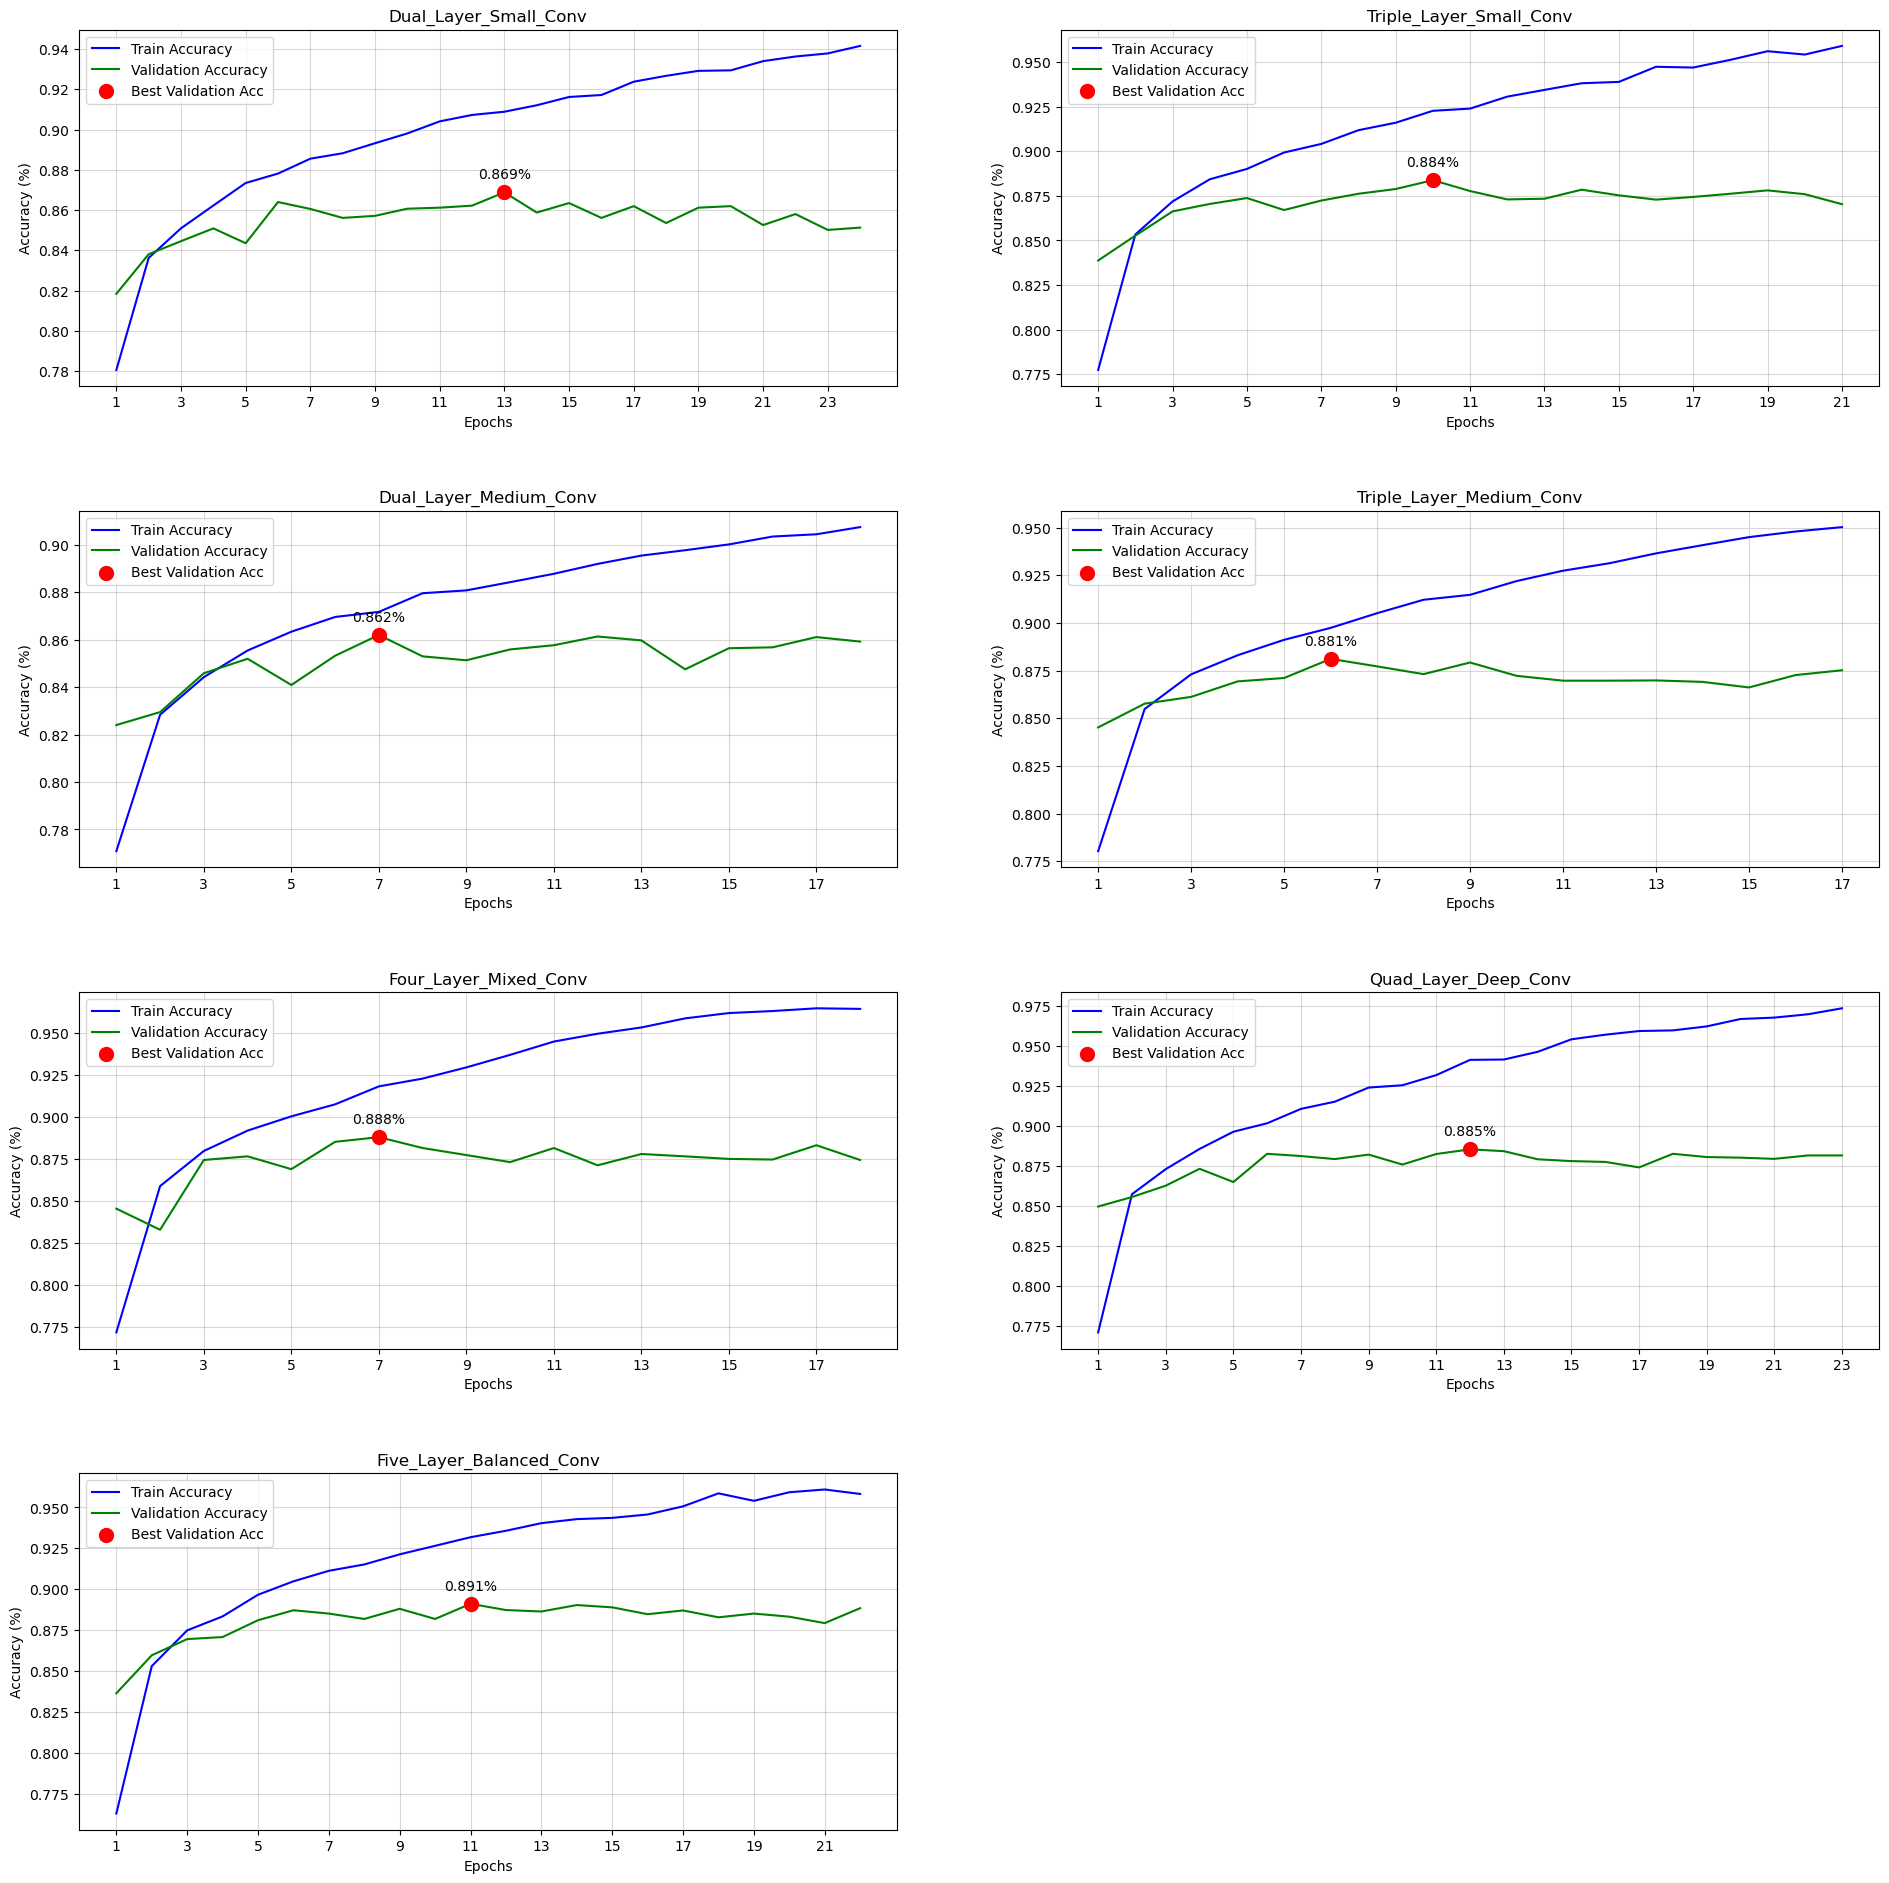

In [157]:
MAX_EPOCHS = 40
K_EPOCHS = 10

cols = 2
rows = np.ceil(7 / cols)
fig, axs = plt.subplots(int(rows), int(cols), figsize=(cols * 10, rows * 5))
axs = axs.flatten()

for idx, config in enumerate(cnn_model_configurations):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = ConvNet(config['config']).to(device)
    optimizer = torch.optim.Adam(model.parameters()) 

    save_model_name = config['name']

    start_time = time()
    best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, training_loader, validation_loader,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data, val_data)
    total_training_time = time() - start_time
    plot_accuracies(train_acc, val_acc, config['name'], axs[idx])
    print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.35)

for i in range(idx + 1, len(axs)):
    axs[i].axis('off')

plt.show()

* Vidíme, že úspěšnost je hned ze začátku vyšší než u dopředných modelů

#### Experimentujte se standardizací/normalizací dat

**Normalizace**

**********************************************************************
Training model Dual_Layer_Small_Conv
**********************************************************************
EPOCH 23:
BEST VALIDATION accuracy: 0.895
Early stopping now
Total training time for Dual_Layer_Small_Conv: 34.24 seconds
**********************************************************************
Training model Triple_Layer_Small_Conv
**********************************************************************
EPOCH 26:
BEST VALIDATION accuracy: 0.900
Early stopping now
Total training time for Triple_Layer_Small_Conv: 43.51 seconds
**********************************************************************
Training model Dual_Layer_Medium_Conv
**********************************************************************
EPOCH 21:
BEST VALIDATION accuracy: 0.895
Early stopping now
Total training time for Dual_Layer_Medium_Conv: 48.11 seconds
**********************************************************************
Training model Tripl

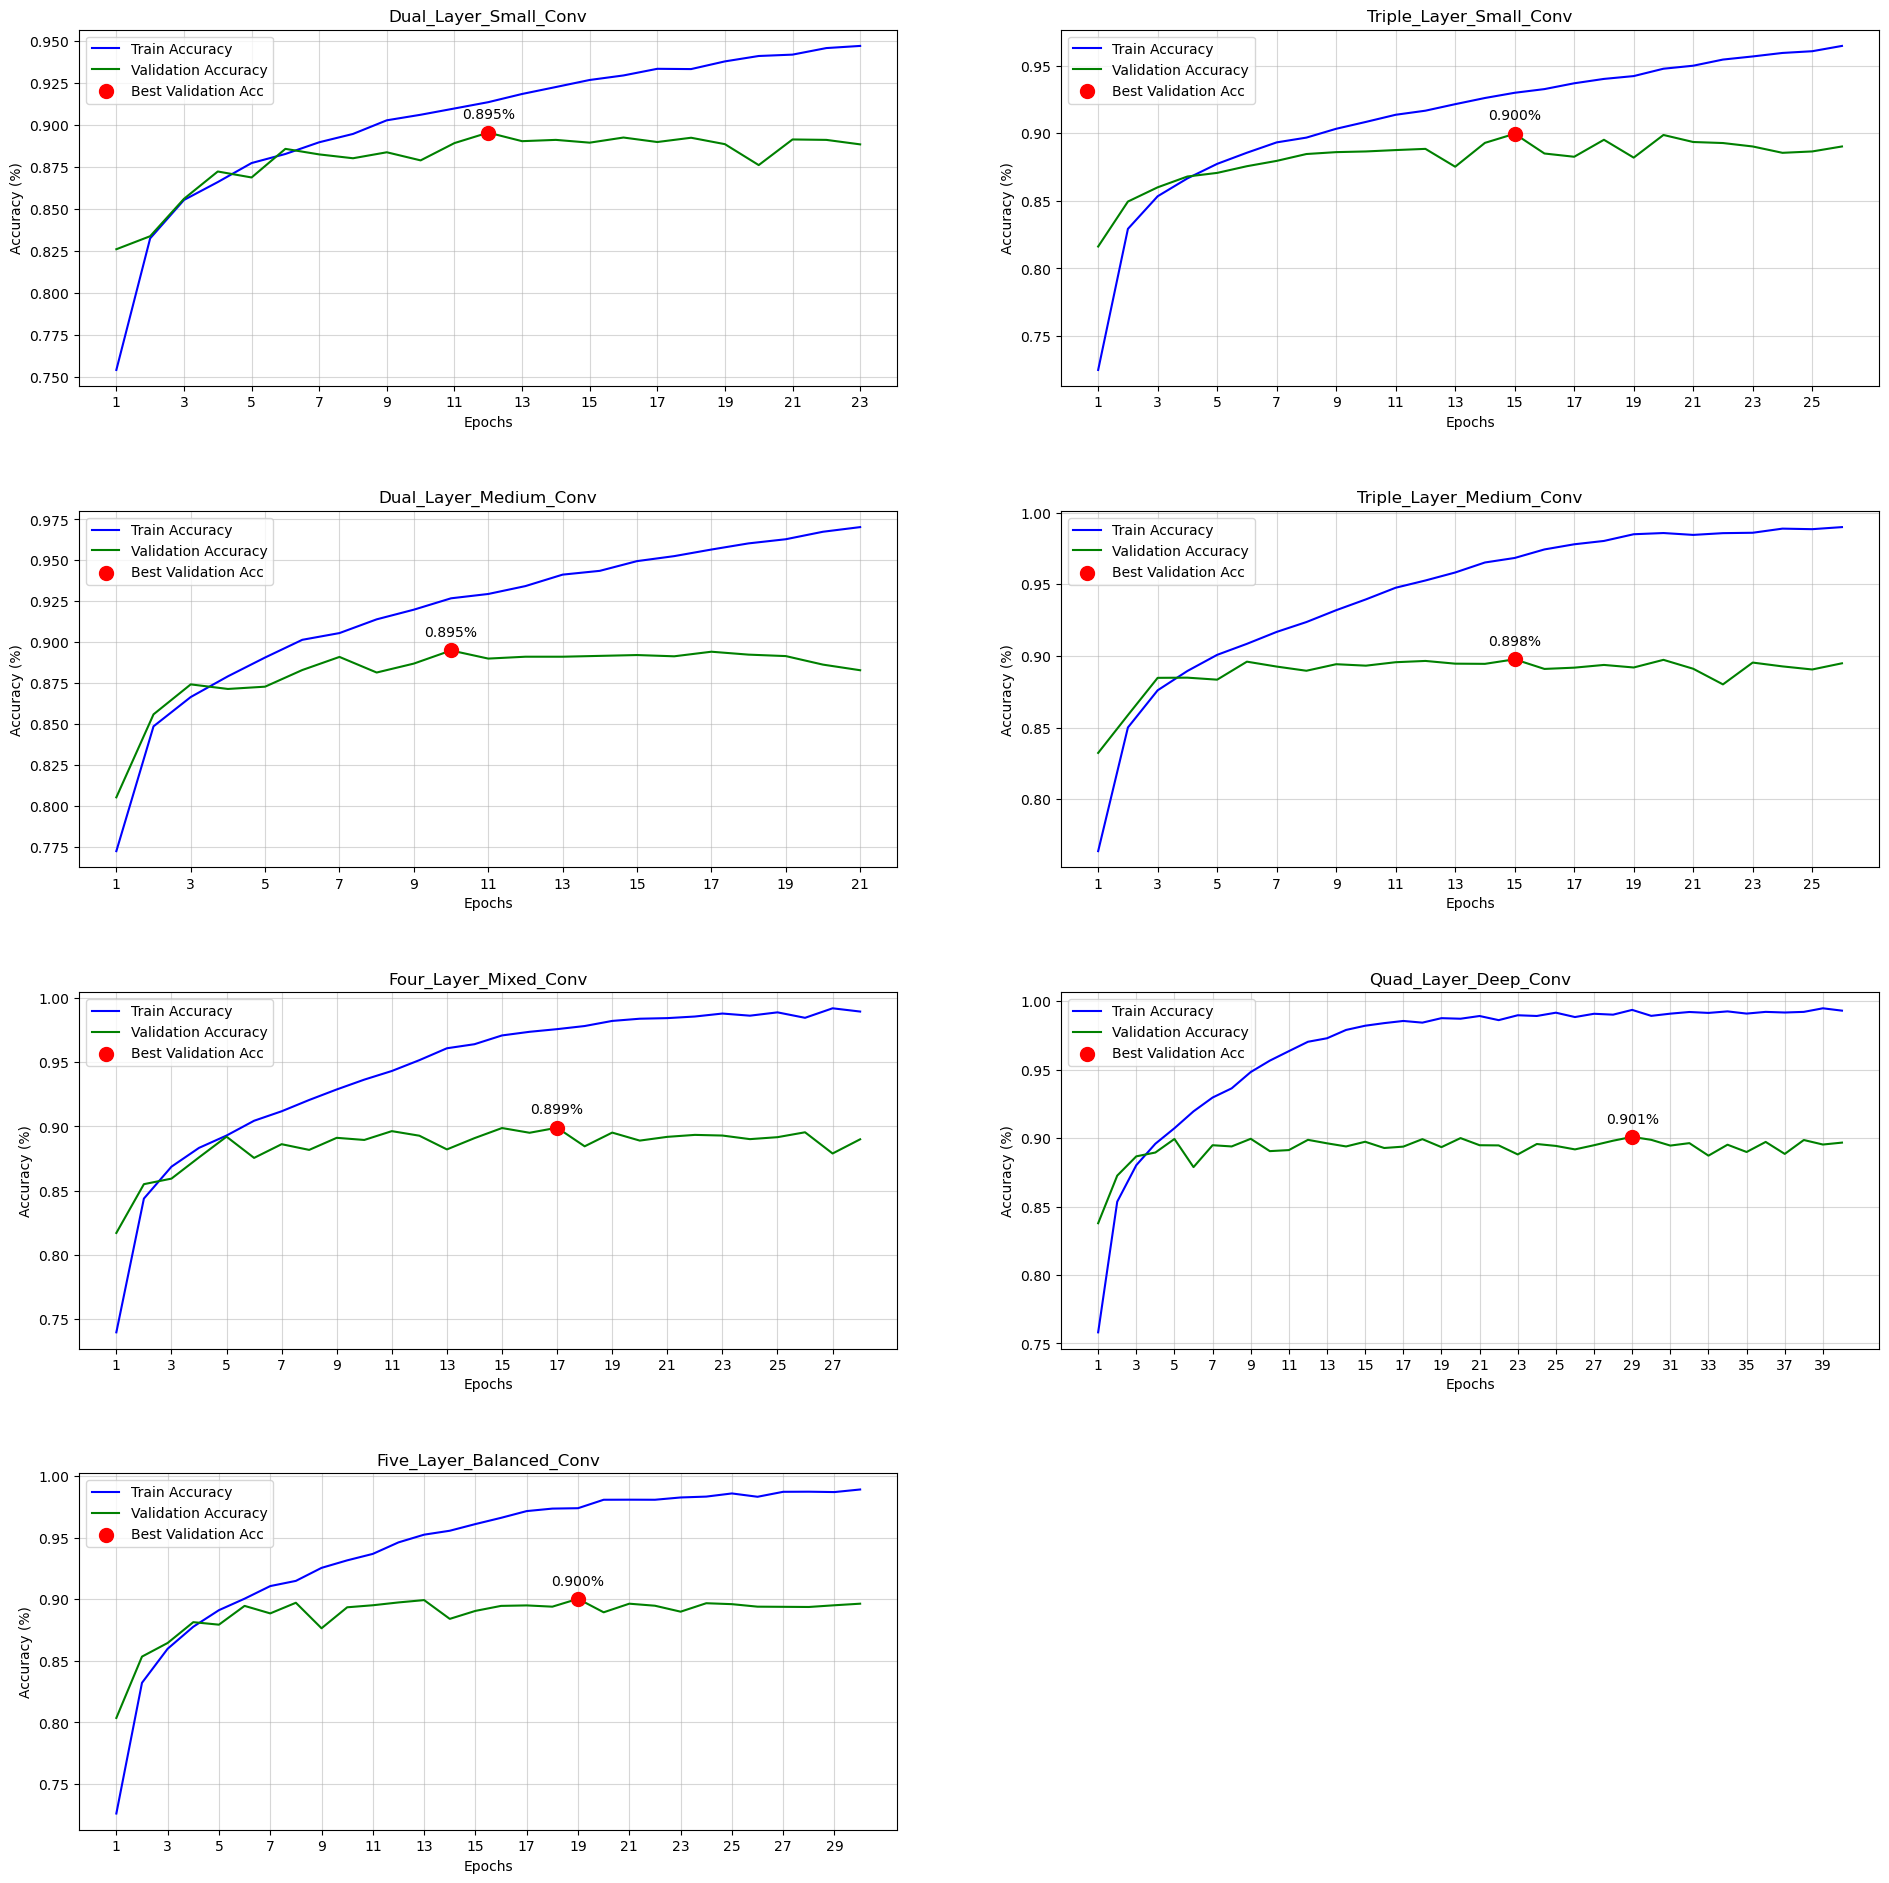

In [158]:
MAX_EPOCHS = 40
K_EPOCHS = 10

cols = 2
rows = np.ceil(7 / cols)
fig, axs = plt.subplots(int(rows), int(cols), figsize=(cols * 10, rows * 5))
axs = axs.flatten()

for idx, config in enumerate(cnn_model_configurations):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = ConvNet(config['config']).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    save_model_name = config['name'] + "_norm"

    start_time = time()
    best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, train_loader_norm, valid_loader_norm,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data_norm, val_data_norm)
    total_training_time = time() - start_time
    plot_accuracies(train_acc, val_acc, config['name'], axs[idx])
    print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.35)

for i in range(idx + 1, len(axs)):
    axs[i].axis('off')

plt.show()

* Vypadá to, že normalizace dat pomohla k lepší výkonnosti modelů

**Standardizace**

**********************************************************************
Training model Dual_Layer_Small_Conv
**********************************************************************
EPOCH 27:
BEST VALIDATION accuracy: 0.887
Early stopping now
Total training time for Dual_Layer_Small_Conv: 40.06 seconds
**********************************************************************
Training model Triple_Layer_Small_Conv
**********************************************************************
EPOCH 22:
BEST VALIDATION accuracy: 0.889
Early stopping now
Total training time for Triple_Layer_Small_Conv: 36.91 seconds
**********************************************************************
Training model Dual_Layer_Medium_Conv
**********************************************************************
EPOCH 20:
BEST VALIDATION accuracy: 0.891
Early stopping now
Total training time for Dual_Layer_Medium_Conv: 45.64 seconds
**********************************************************************
Training model Tripl

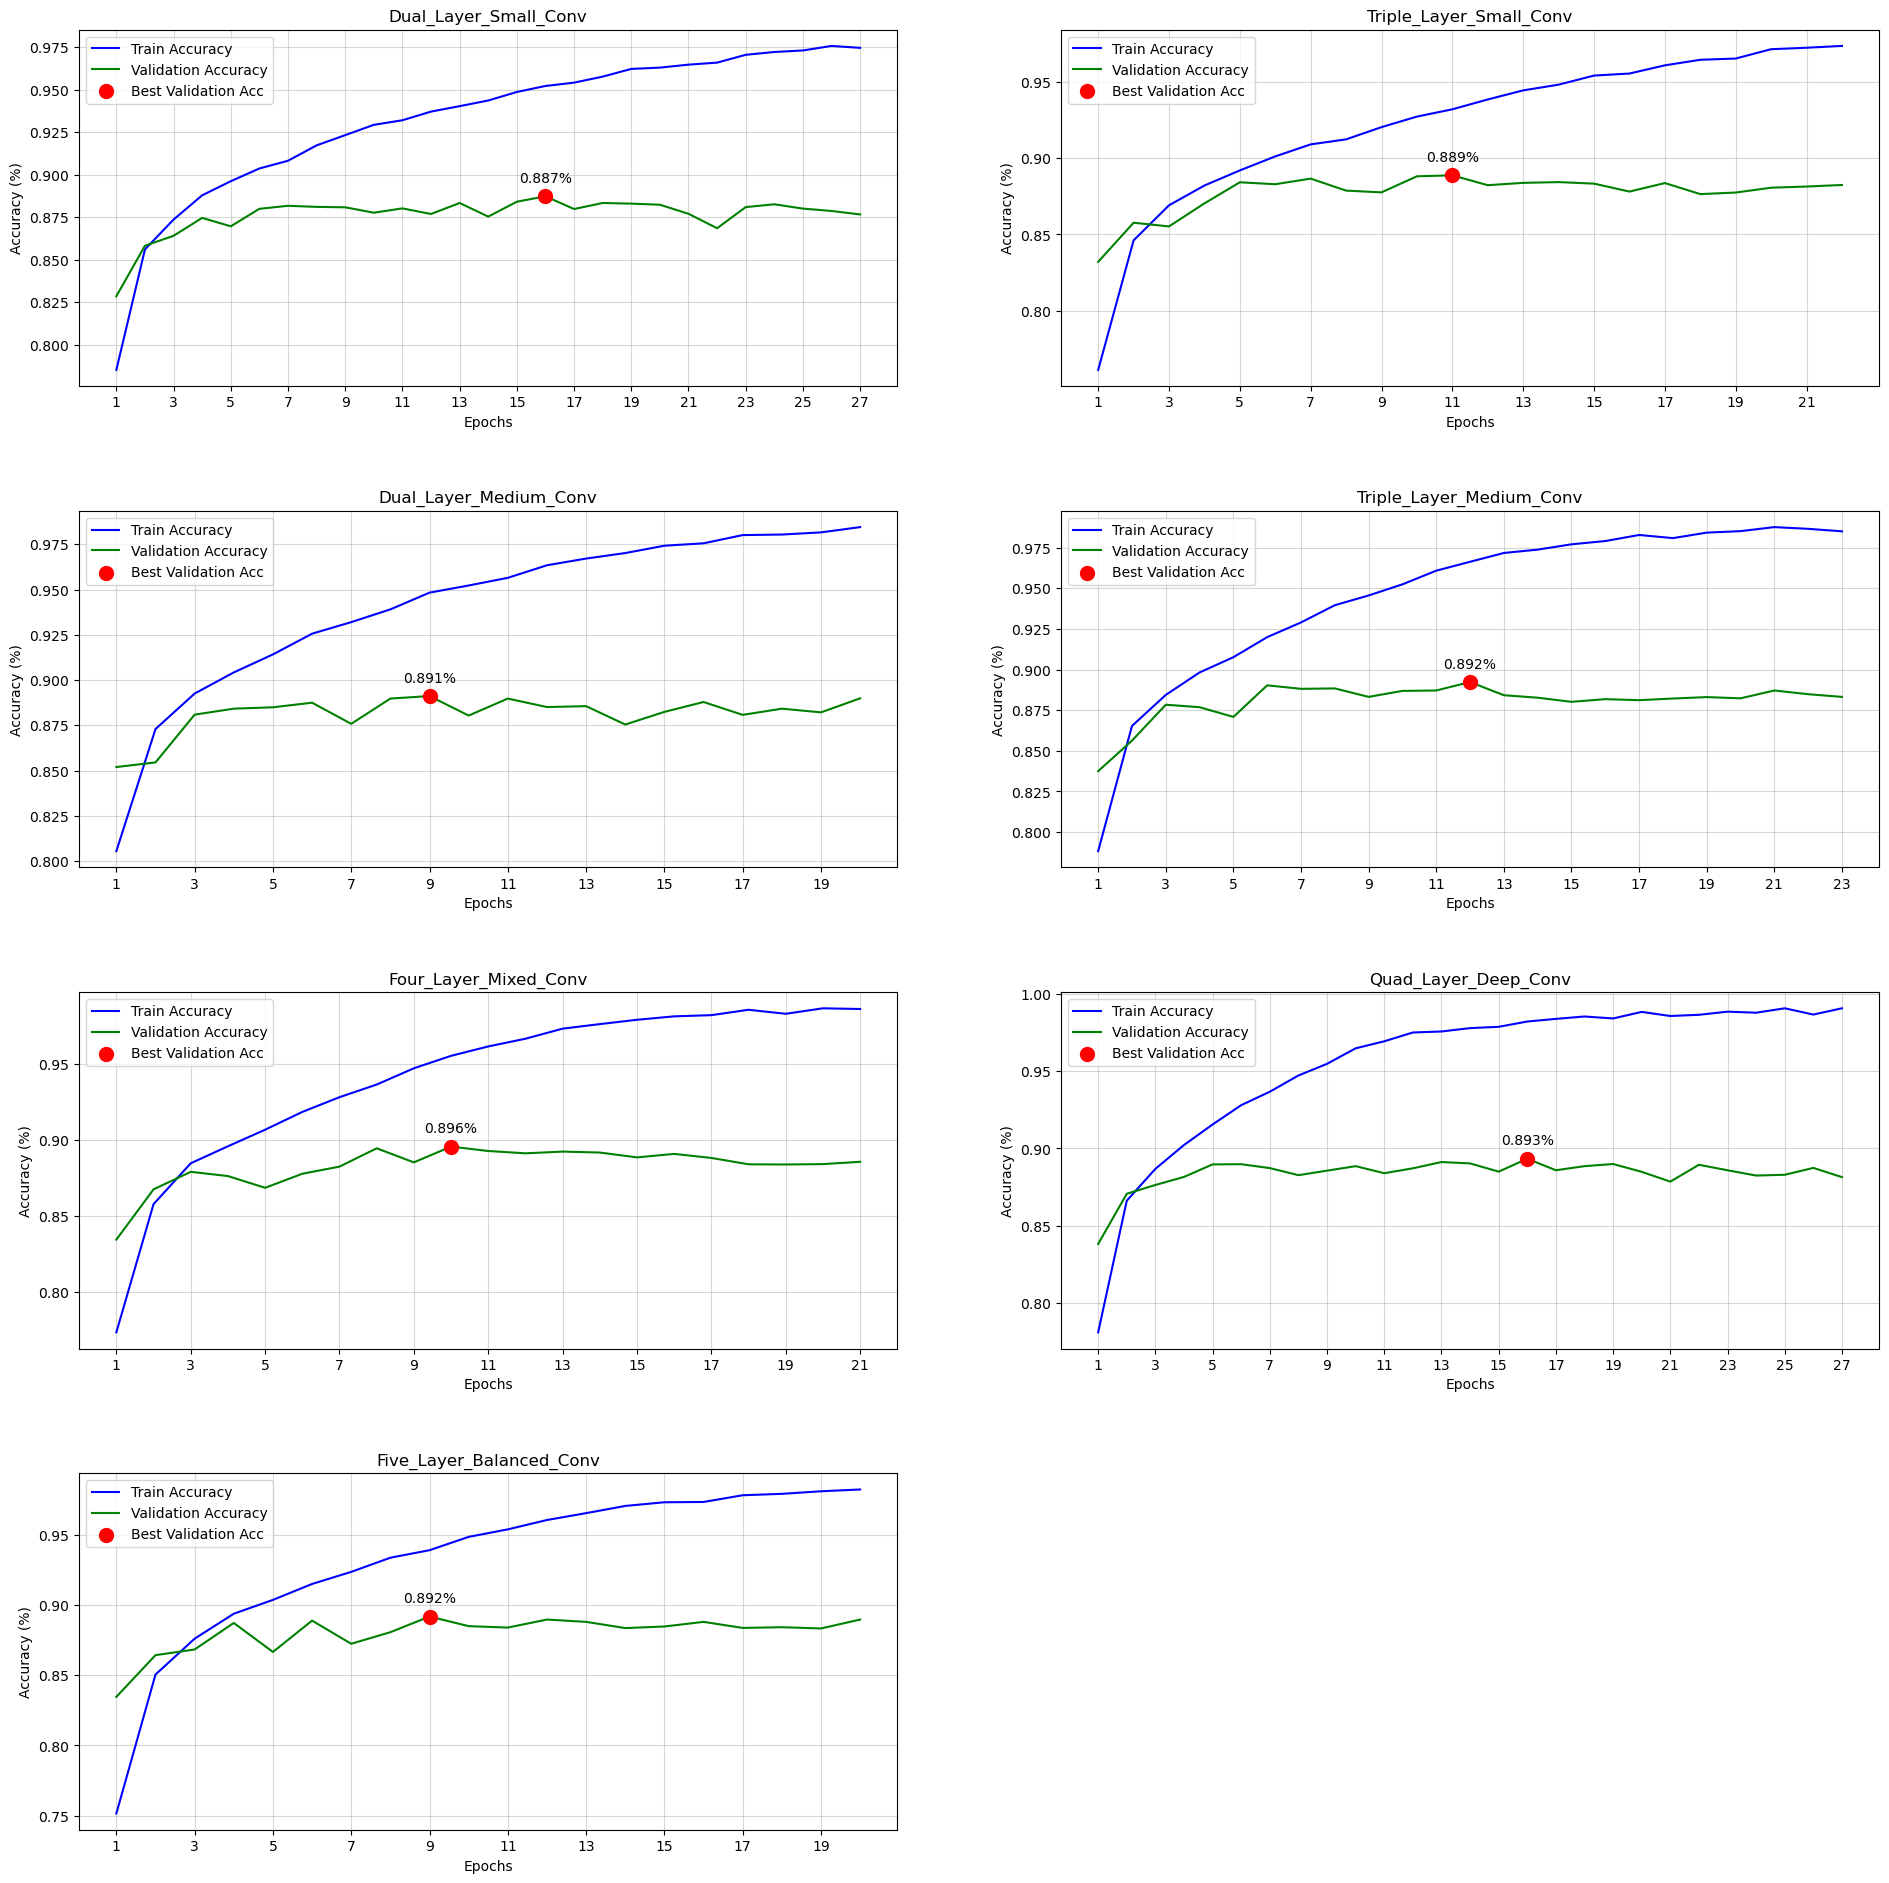

In [159]:
MAX_EPOCHS = 40
K_EPOCHS = 10

cols = 2
rows = np.ceil(7 / cols)
fig, axs = plt.subplots(int(rows), int(cols), figsize=(cols * 10, rows * 5))
axs = axs.flatten()

for idx, config in enumerate(cnn_model_configurations):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = ConvNet(config['config']).to(device)
    optimizer = torch.optim.Adam(model.parameters())\

    save_model_name = config['name'] + "_stand"

    start_time = time()
    best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, train_loader_stand, valid_loader_stand,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data_stand, val_data_stand)
    total_training_time = time() - start_time
    plot_accuracies(train_acc, val_acc, config['name'], axs[idx])
    print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.35)

for i in range(idx + 1, len(axs)):
    axs[i].axis('off')

plt.show()

* Standardizace dat také o trochu vylepšila výkonnost

#### Experimentujte s různými optimalizačními metodami
* Definujme opět několik různých optimizerů z knihovny PyTorch a zkusme, které z nich se budou chovat pro naše modely nejlépe

In [160]:
MAX_EPOCHS = 20
K_EPOCHS = 5

for idx, config in enumerate(cnn_model_configurations):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    model = ConvNet(config['config']).to(device)

    optimizers = {
    'Adam': torch.optim.Adam(model.parameters()),
    'AdamW': torch.optim.AdamW(model.parameters()),
    'Adamax': torch.optim.Adamax(model.parameters()),
    'NAdam': torch.optim.NAdam(model.parameters()),
    'RAdam': torch.optim.RAdam(model.parameters()),
    'RMSprop': torch.optim.RMSprop(model.parameters()),
    'SGD': torch.optim.SGD(model.parameters()),
    }

    for name in optimizers:
        print(f'USING {name} optimizer')
        optimizer = optimizers[name]

        save_model_name = config['name'] + "_" + name

        start_time = time()
        trainModel(model, loss_fn, optimizer, training_loader, validation_loader, MAX_EPOCHS, K_EPOCHS, save_model_name, train_data, val_data)
        total_training_time = time() - start_time
        print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

**********************************************************************
Training model Dual_Layer_Small_Conv
**********************************************************************
USING Adam optimizer
EPOCH 19:
BEST VALIDATION accuracy: 0.868
Early stopping now
Total training time for Dual_Layer_Small_Conv: 28.27 seconds
USING AdamW optimizer
EPOCH 8:
BEST VALIDATION accuracy: 0.863
Early stopping now
Total training time for Dual_Layer_Small_Conv: 12.07 seconds
USING Adamax optimizer
EPOCH 12:
BEST VALIDATION accuracy: 0.866
Early stopping now
Total training time for Dual_Layer_Small_Conv: 17.84 seconds
USING NAdam optimizer
EPOCH 10:
BEST VALIDATION accuracy: 0.854
Early stopping now
Total training time for Dual_Layer_Small_Conv: 15.20 seconds
USING RAdam optimizer
EPOCH 14:
BEST VALIDATION accuracy: 0.856
Early stopping now
Total training time for Dual_Layer_Small_Conv: 21.03 seconds
USING RMSprop optimizer
EPOCH 7:
BEST VALIDATION accuracy: 0.680
Early stopping now
Total training tim

* Z výsledků experimentování plyne, že nám stále nejlépe vychází tyto optimalizační algoritmy:
    * Adam, AdamW, Adamax, RAdam, NAdam

#### Experimentujte s různými regularizačními technikami
* Definujeme upravenou třídu, která přidá dropout před výstupní vrstvu
* Dále přidejme L1 a L2 regularizaci

In [161]:
class ConvNetDrop(nn.Module):
    def __init__(self, layer_sizes, dropout_rate=0.5):
        super(ConvNetDrop, self).__init__()
        self.layers = nn.ModuleList()
        input_channels = 1

        for size in layer_sizes:
            self.layers.append(nn.Conv2d(input_channels, size, kernel_size=3, padding=1))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            input_channels = size

        self.dropout = nn.Dropout(dropout_rate)
        final_size = self.calculate_final_size(32, len(layer_sizes))

        self.fc = nn.Linear(input_channels * final_size * final_size, 10)

    def calculate_final_size(self, input_size, num_layers):
        size = input_size
        for _ in range(num_layers):
            size = (size - 2) // 2 + 1
        return size

    def forward(self, x):
        if x.dim() == 5:
            x = x.squeeze(2)
        
        for layer in self.layers:
            x = layer(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

* Vyzkoušejme různé hodnoty dropoutu

In [162]:
MAX_EPOCHS = 20
K_EPOCHS = 5

dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for idx, config in enumerate(cnn_model_configurations):
    print('*' * 70)
    print(f"Training model {config['name']}")
    print('*' * 70)

    for dropout in dropouts:
        print(f'USING {dropout} droupout rate')
        model = ConvNetDrop(config['config'], dropout).to(device)
        optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-3)

        save_model_name = config['name'] + "_" + str(dropout)

        start_time = time()
        best_vacc, train_acc, val_acc = trainModel(model, loss_fn, optimizer, training_loader, validation_loader,
                                               MAX_EPOCHS, K_EPOCHS, save_model_name, train_data, val_data, True)
        total_training_time = time() - start_time
        print(f"Total training time for {config['name']}: {total_training_time:.2f} seconds")

**********************************************************************
Training model Dual_Layer_Small_Conv
**********************************************************************
USING 0.1 droupout rate
EPOCH 20:
BEST VALIDATION accuracy: 0.824
Early stopping now
Total training time for Dual_Layer_Small_Conv: 32.86 seconds
USING 0.2 droupout rate
EPOCH 19:
BEST VALIDATION accuracy: 0.826
Early stopping now
Total training time for Dual_Layer_Small_Conv: 31.37 seconds
USING 0.3 droupout rate
Trained on all 20 epochs.
BEST VALIDATION accuracy: 0.826
Total training time for Dual_Layer_Small_Conv: 33.06 seconds
USING 0.4 droupout rate
EPOCH 20:
BEST VALIDATION accuracy: 0.818
Early stopping now
Total training time for Dual_Layer_Small_Conv: 32.97 seconds
USING 0.5 droupout rate
Trained on all 20 epochs.
BEST VALIDATION accuracy: 0.821
Total training time for Dual_Layer_Small_Conv: 32.92 seconds
USING 0.6 droupout rate
Trained on all 20 epochs.
BEST VALIDATION accuracy: 0.818
Total training 

* Použitím tohoto přístupu jsme si opět moc nepomohli

#### Kombinace všeho pro výběr nejlepšího modelu konvoluční sítě pomocí knihovny Optuna
* Pomocí výsledků přechozích experimentů redukujme počet hyperparametrů a zkusme je doladit pomocí knihovny Optuna

In [188]:
def objective(trial):
    config_index = trial.suggest_int('config_index', 0, len(cnn_model_configurations) - 1)
    model_config = cnn_model_configurations[config_index]

    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.7)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'NAdam', 'AdamW', 'Adamax', 'RAdam'])
    dataset_type = trial.suggest_categorical('dataset_type', ['basic', 'normalized', 'standardized'])

    l1_lambda = trial.suggest_float('l1_lambda', 0, 1e-3)
    l2_lambda = trial.suggest_float('l2_lambda', 0, 1e-3)

    model = ConvNetDrop(model_config['config'], dropout_rate)
    model.to(device)

    optimizer = getattr(optim, optimizer_name)(model.parameters(), weight_decay=l2_lambda)

    train_loader = loaders[dataset_type]['train']
    valid_loader = loaders[dataset_type]['valid']

    train_data = sets[dataset_type]['train']
    val_data = sets[dataset_type]['valid']

    criterion = nn.CrossEntropyLoss()

    accuracies = trainModel(model, loss_fn, optimizer, train_loader, valid_loader, 
                                      35, 10, model_config['name'], train_data, val_data, reg=True, l_alpha=l1_lambda, save=False)

    return accuracies[0]

In [189]:
studyConv = optuna.create_study(direction='maximize')
studyConv.optimize(objective, n_trials=65)
print("Best trial:")
trialBestCNV = studyConv.best_trial
print(" Value: ", trialBestCNV.value)
print(" Params: ")
for key, value in trialBestCNV.params.items():
    print("    {}: {}".format(key, value))

[I 2024-05-06 10:06:31,979] A new study created in memory with name: no-name-9f7b2639-d58b-4f8b-ac64-94e75fc75c70
[I 2024-05-06 10:07:26,172] Trial 0 finished with value: 0.8921905159950256 and parameters: {'config_index': 4, 'dropout_rate': 0.060023896819772125, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 0.0004274020408360598, 'l2_lambda': 0.0005024581735261195}. Best is trial 0 with value: 0.8921905159950256.


EPOCH 24:
BEST VALIDATION accuracy: 0.892
Early stopping now


[I 2024-05-06 10:08:47,028] Trial 1 finished with value: 0.9073016047477722 and parameters: {'config_index': 4, 'dropout_rate': 0.637413814770579, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0007544308072735974, 'l2_lambda': 0.00035598247557286545}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 10:09:50,648] Trial 2 finished with value: 0.8958730697631836 and parameters: {'config_index': 1, 'dropout_rate': 0.07663451659537357, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 1.2248577876791678e-05, 'l2_lambda': 0.0005332327389708613}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.896


[I 2024-05-06 10:12:46,033] Trial 3 finished with value: 0.8880000114440918 and parameters: {'config_index': 5, 'dropout_rate': 0.5620958529444602, 'optimizer': 'NAdam', 'dataset_type': 'basic', 'l1_lambda': 0.00036585320240688126, 'l2_lambda': 0.0005639839081564306}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.888


[I 2024-05-06 10:13:49,555] Trial 4 finished with value: 0.896507978439331 and parameters: {'config_index': 1, 'dropout_rate': 0.545564496936364, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 0.000775302127188574, 'l2_lambda': 0.00012806794782167896}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.897


[I 2024-05-06 10:15:29,202] Trial 5 finished with value: 0.8924444913864136 and parameters: {'config_index': 3, 'dropout_rate': 0.6019794872972604, 'optimizer': 'Adam', 'dataset_type': 'basic', 'l1_lambda': 0.000523191751442446, 'l2_lambda': 0.00021931208206406506}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.892


[I 2024-05-06 10:17:09,743] Trial 6 finished with value: 0.8838095664978027 and parameters: {'config_index': 3, 'dropout_rate': 0.1868927020249298, 'optimizer': 'NAdam', 'dataset_type': 'basic', 'l1_lambda': 0.00018643750384834902, 'l2_lambda': 0.0009421690217627492}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.884


[I 2024-05-06 10:18:05,368] Trial 7 finished with value: 0.9047619104385376 and parameters: {'config_index': 4, 'dropout_rate': 0.19900612973944123, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0006637182070300068, 'l2_lambda': 0.0006196628996197228}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 25:
BEST VALIDATION accuracy: 0.905
Early stopping now


[I 2024-05-06 10:19:32,722] Trial 8 finished with value: 0.8973968625068665 and parameters: {'config_index': 6, 'dropout_rate': 0.35841162462016546, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 0.00010157916353734709, 'l2_lambda': 0.00022870795109272536}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 32:
BEST VALIDATION accuracy: 0.897
Early stopping now


[I 2024-05-06 10:20:55,447] Trial 9 finished with value: 0.8878730535507202 and parameters: {'config_index': 2, 'dropout_rate': 0.003727280628082552, 'optimizer': 'RAdam', 'dataset_type': 'standardized', 'l1_lambda': 0.00018307178014778202, 'l2_lambda': 0.00033127132431303043}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 34:
BEST VALIDATION accuracy: 0.888
Early stopping now


[I 2024-05-06 10:21:52,635] Trial 10 finished with value: 0.8808889389038086 and parameters: {'config_index': 0, 'dropout_rate': 0.6786809095620444, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009944812689671582, 'l2_lambda': 2.125057260818098e-05}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.881


[I 2024-05-06 10:24:46,260] Trial 11 finished with value: 0.8996825814247131 and parameters: {'config_index': 5, 'dropout_rate': 0.31476506036677615, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.000693007903337562, 'l2_lambda': 0.0006971232195947121}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.900


[I 2024-05-06 10:26:04,584] Trial 12 finished with value: 0.8968889117240906 and parameters: {'config_index': 4, 'dropout_rate': 0.4092575188882135, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0007414539298425916, 'l2_lambda': 0.0007568569679013109}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.897


[I 2024-05-06 10:27:11,877] Trial 13 finished with value: 0.9000635147094727 and parameters: {'config_index': 4, 'dropout_rate': 0.23662333683224424, 'optimizer': 'Adam', 'dataset_type': 'normalized', 'l1_lambda': 0.0009124162597645966, 'l2_lambda': 0.00038795361688619086}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 30:
BEST VALIDATION accuracy: 0.900
Early stopping now


[I 2024-05-06 10:28:18,184] Trial 14 finished with value: 0.9034920930862427 and parameters: {'config_index': 6, 'dropout_rate': 0.43673022037090836, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005910231296688789, 'l2_lambda': 0.0007517499885886794}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 24:
BEST VALIDATION accuracy: 0.903
Early stopping now


[I 2024-05-06 10:30:16,839] Trial 15 finished with value: 0.897777795791626 and parameters: {'config_index': 5, 'dropout_rate': 0.18158678082192836, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.0008317174635407101, 'l2_lambda': 0.00035566555236648867}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 24:
BEST VALIDATION accuracy: 0.898
Early stopping now


[I 2024-05-06 10:31:42,280] Trial 16 finished with value: 0.8905397057533264 and parameters: {'config_index': 2, 'dropout_rate': 0.6869634607636215, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0006239041335699724, 'l2_lambda': 0.0006561035757516177}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.891


[I 2024-05-06 10:33:00,179] Trial 17 finished with value: 0.9017143249511719 and parameters: {'config_index': 4, 'dropout_rate': 0.49046796125511244, 'optimizer': 'Adamax', 'dataset_type': 'basic', 'l1_lambda': 0.00086004358625026, 'l2_lambda': 0.0009145507572365635}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.902


[I 2024-05-06 10:34:40,314] Trial 18 finished with value: 0.901206374168396 and parameters: {'config_index': 3, 'dropout_rate': 0.2958171980616875, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.00036741012213406597, 'l2_lambda': 0.00041904481844219816}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.901


[I 2024-05-06 10:37:04,856] Trial 19 finished with value: 0.8947302103042603 and parameters: {'config_index': 5, 'dropout_rate': 0.1246763627415891, 'optimizer': 'Adam', 'dataset_type': 'standardized', 'l1_lambda': 0.0006586877488801233, 'l2_lambda': 0.0005954751187368119}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 29:
BEST VALIDATION accuracy: 0.895
Early stopping now


[I 2024-05-06 10:38:31,081] Trial 20 finished with value: 0.8765714764595032 and parameters: {'config_index': 2, 'dropout_rate': 0.24686406320298032, 'optimizer': 'NAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0005018980129275643, 'l2_lambda': 0.0008503750564405781}. Best is trial 1 with value: 0.9073016047477722.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.877


[I 2024-05-06 10:39:31,822] Trial 21 finished with value: 0.9037460684776306 and parameters: {'config_index': 6, 'dropout_rate': 0.43935677422332653, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005852387097296204, 'l2_lambda': 0.0007582956172714398}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 22:
BEST VALIDATION accuracy: 0.904
Early stopping now


[I 2024-05-06 10:40:51,823] Trial 22 finished with value: 0.9028571844100952 and parameters: {'config_index': 6, 'dropout_rate': 0.4720346105144262, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0005702688142555179, 'l2_lambda': 0.00081698782640076}. Best is trial 1 with value: 0.9073016047477722.


EPOCH 29:
BEST VALIDATION accuracy: 0.903
Early stopping now


[I 2024-05-06 10:43:46,022] Trial 23 finished with value: 0.9074286222457886 and parameters: {'config_index': 5, 'dropout_rate': 0.6185338854282505, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.000745538461300795, 'l2_lambda': 0.0006397475298214414}. Best is trial 23 with value: 0.9074286222457886.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 10:45:02,650] Trial 24 finished with value: 0.9078095555305481 and parameters: {'config_index': 4, 'dropout_rate': 0.5895746061611143, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0007574976841319752, 'l2_lambda': 0.00043936973941219754}. Best is trial 24 with value: 0.9078095555305481.


EPOCH 34:
BEST VALIDATION accuracy: 0.908
Early stopping now


[I 2024-05-06 10:47:36,820] Trial 25 finished with value: 0.9059047698974609 and parameters: {'config_index': 5, 'dropout_rate': 0.6208433694088041, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009555568866211368, 'l2_lambda': 0.0004492660805448075}. Best is trial 24 with value: 0.9078095555305481.


EPOCH 31:
BEST VALIDATION accuracy: 0.906
Early stopping now


[I 2024-05-06 10:48:42,054] Trial 26 finished with value: 0.9092063903808594 and parameters: {'config_index': 4, 'dropout_rate': 0.6054834754258469, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.000791499537001577, 'l2_lambda': 0.000294855858816152}. Best is trial 26 with value: 0.9092063903808594.


EPOCH 29:
BEST VALIDATION accuracy: 0.909
Early stopping now


[I 2024-05-06 10:50:22,805] Trial 27 finished with value: 0.9078095555305481 and parameters: {'config_index': 3, 'dropout_rate': 0.5505807853693973, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008764729552449532, 'l2_lambda': 0.00026932589351115395}. Best is trial 26 with value: 0.9092063903808594.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 10:52:03,777] Trial 28 finished with value: 0.9081904888153076 and parameters: {'config_index': 3, 'dropout_rate': 0.5293961480323522, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008561061959023161, 'l2_lambda': 0.00027680426074781225}. Best is trial 26 with value: 0.9092063903808594.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 10:53:29,297] Trial 29 finished with value: 0.8924444913864136 and parameters: {'config_index': 2, 'dropout_rate': 0.5247793211022301, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008203629057080804, 'l2_lambda': 0.00015958750653478573}. Best is trial 26 with value: 0.9092063903808594.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.892


[I 2024-05-06 10:54:47,995] Trial 30 finished with value: 0.9098412990570068 and parameters: {'config_index': 4, 'dropout_rate': 0.4948475016729871, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009265238924846138, 'l2_lambda': 0.0004788514757084059}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.910


[I 2024-05-06 10:56:02,423] Trial 31 finished with value: 0.9061587452888489 and parameters: {'config_index': 4, 'dropout_rate': 0.5904496787007784, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009588759861927246, 'l2_lambda': 0.0004931272492814428}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 33:
BEST VALIDATION accuracy: 0.906
Early stopping now


[I 2024-05-06 10:57:21,404] Trial 32 finished with value: 0.9071746468544006 and parameters: {'config_index': 4, 'dropout_rate': 0.5136382850025825, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009006027810443005, 'l2_lambda': 0.00027871592328620375}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 10:59:02,320] Trial 33 finished with value: 0.9042540192604065 and parameters: {'config_index': 3, 'dropout_rate': 0.6481524449555884, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.000811906178285483, 'l2_lambda': 0.0004879308986753737}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.904


[I 2024-05-06 11:00:43,187] Trial 34 finished with value: 0.9067936539649963 and parameters: {'config_index': 3, 'dropout_rate': 0.3976279958821276, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0007008178324892025, 'l2_lambda': 9.492798760168852e-05}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 11:02:01,720] Trial 35 finished with value: 0.9005714654922485 and parameters: {'config_index': 4, 'dropout_rate': 0.573935523255236, 'optimizer': 'AdamW', 'dataset_type': 'standardized', 'l1_lambda': 0.0009251670832498414, 'l2_lambda': 0.0003227807911972021}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.901


[I 2024-05-06 11:03:17,277] Trial 36 finished with value: 0.8854603171348572 and parameters: {'config_index': 3, 'dropout_rate': 0.6520763902551451, 'optimizer': 'NAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0007782972100942497, 'l2_lambda': 0.0005288820860159668}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 26:
BEST VALIDATION accuracy: 0.885
Early stopping now


[I 2024-05-06 11:04:35,855] Trial 37 finished with value: 0.9062857627868652 and parameters: {'config_index': 4, 'dropout_rate': 0.47524930092771805, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009939572323570743, 'l2_lambda': 0.00041275807330927385}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.906


[I 2024-05-06 11:05:39,353] Trial 38 finished with value: 0.8953651189804077 and parameters: {'config_index': 1, 'dropout_rate': 0.5231314708365226, 'optimizer': 'Adam', 'dataset_type': 'normalized', 'l1_lambda': 0.0008580881936691531, 'l2_lambda': 0.00020151801978661191}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.895


[I 2024-05-06 11:08:03,700] Trial 39 finished with value: 0.8971428871154785 and parameters: {'config_index': 5, 'dropout_rate': 0.5791324052777672, 'optimizer': 'AdamW', 'dataset_type': 'standardized', 'l1_lambda': 0.00039953589123905837, 'l2_lambda': 0.0002865697391326409}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 29:
BEST VALIDATION accuracy: 0.897
Early stopping now


[I 2024-05-06 11:09:43,923] Trial 40 finished with value: 0.8986666798591614 and parameters: {'config_index': 3, 'dropout_rate': 0.3697863837483851, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0007831673389399322, 'l2_lambda': 0.0004582056319773955}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.899


[I 2024-05-06 11:11:24,646] Trial 41 finished with value: 0.9075555801391602 and parameters: {'config_index': 3, 'dropout_rate': 0.5332069853109016, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008811152853822279, 'l2_lambda': 0.0002622295344304661}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 11:12:49,727] Trial 42 finished with value: 0.8938412666320801 and parameters: {'config_index': 2, 'dropout_rate': 0.5632221604686296, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0007255847574734617, 'l2_lambda': 0.00016936875195524718}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.894


[I 2024-05-06 11:14:01,637] Trial 43 finished with value: 0.9073016047477722 and parameters: {'config_index': 4, 'dropout_rate': 0.6068399036188145, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.00027724426905450844, 'l2_lambda': 9.277658526142502e-05}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 32:
BEST VALIDATION accuracy: 0.907
Early stopping now


[I 2024-05-06 11:15:20,132] Trial 44 finished with value: 0.8961269855499268 and parameters: {'config_index': 4, 'dropout_rate': 0.5523073842118114, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 0.0009403474997775584, 'l2_lambda': 0.00035898372843721794}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.896


[I 2024-05-06 11:16:47,346] Trial 45 finished with value: 0.9014603495597839 and parameters: {'config_index': 3, 'dropout_rate': 0.493654631621287, 'optimizer': 'NAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0004584999566246597, 'l2_lambda': 0.0002935038136440899}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 30:
BEST VALIDATION accuracy: 0.901
Early stopping now


[I 2024-05-06 11:18:28,058] Trial 46 finished with value: 0.9057778120040894 and parameters: {'config_index': 3, 'dropout_rate': 0.668780440936471, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008664618098423693, 'l2_lambda': 0.00023660263844485843}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.906


[I 2024-05-06 11:20:08,586] Trial 47 finished with value: 0.9041270017623901 and parameters: {'config_index': 3, 'dropout_rate': 0.4292106303223029, 'optimizer': 'AdamW', 'dataset_type': 'standardized', 'l1_lambda': 0.0008162323562455589, 'l2_lambda': 0.0005597423593319757}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.904


[I 2024-05-06 11:21:26,939] Trial 48 finished with value: 0.9064127206802368 and parameters: {'config_index': 4, 'dropout_rate': 0.6353858480975461, 'optimizer': 'Adam', 'dataset_type': 'normalized', 'l1_lambda': 0.0006568856174714735, 'l2_lambda': 0.00037206223957096933}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.906


[I 2024-05-06 11:22:51,837] Trial 49 finished with value: 0.8750476241111755 and parameters: {'config_index': 2, 'dropout_rate': 0.6985541203361156, 'optimizer': 'AdamW', 'dataset_type': 'basic', 'l1_lambda': 0.0009866403396396738, 'l2_lambda': 0.0003079046161997112}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.875


[I 2024-05-06 11:24:10,053] Trial 50 finished with value: 0.904888927936554 and parameters: {'config_index': 4, 'dropout_rate': 0.5531248648310193, 'optimizer': 'RAdam', 'dataset_type': 'normalized', 'l1_lambda': 0.0007817205342266916, 'l2_lambda': 3.013516208022081e-06}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.905


[I 2024-05-06 11:25:50,874] Trial 51 finished with value: 0.908317506313324 and parameters: {'config_index': 3, 'dropout_rate': 0.5316427056074519, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008873913788957178, 'l2_lambda': 0.0002602972559031125}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 35:
BEST VALIDATION accuracy: 0.908
Early stopping now


[I 2024-05-06 11:27:31,791] Trial 52 finished with value: 0.9081904888153076 and parameters: {'config_index': 3, 'dropout_rate': 0.45781228191204953, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008832079379899308, 'l2_lambda': 0.00018329521694619233}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 11:28:50,573] Trial 53 finished with value: 0.9041270017623901 and parameters: {'config_index': 4, 'dropout_rate': 0.4597892599562558, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009209578658980538, 'l2_lambda': 0.00019172427466241856}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.904


[I 2024-05-06 11:30:15,276] Trial 54 finished with value: 0.8836825489997864 and parameters: {'config_index': 2, 'dropout_rate': 0.5062756174289609, 'optimizer': 'Adamax', 'dataset_type': 'normalized', 'l1_lambda': 0.0008421803966747088, 'l2_lambda': 8.283081453887701e-05}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.884


[I 2024-05-06 11:31:50,575] Trial 55 finished with value: 0.9067936539649963 and parameters: {'config_index': 3, 'dropout_rate': 0.38817019736320574, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0007099162726995417, 'l2_lambda': 0.0001412256231031662}. Best is trial 30 with value: 0.9098412990570068.


EPOCH 33:
BEST VALIDATION accuracy: 0.907
Early stopping now


[I 2024-05-06 11:34:45,040] Trial 56 finished with value: 0.908317506313324 and parameters: {'config_index': 5, 'dropout_rate': 0.3181210744454411, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008941734074954192, 'l2_lambda': 0.00023239034511149474}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 11:37:39,921] Trial 57 finished with value: 0.8885079622268677 and parameters: {'config_index': 5, 'dropout_rate': 0.35353740921005194, 'optimizer': 'NAdam', 'dataset_type': 'basic', 'l1_lambda': 0.0008917901298127929, 'l2_lambda': 0.00011937903051012451}. Best is trial 30 with value: 0.9098412990570068.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.889


[I 2024-05-06 11:40:04,260] Trial 58 finished with value: 0.9099682569503784 and parameters: {'config_index': 5, 'dropout_rate': 0.4431610336297457, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009547159276216895, 'l2_lambda': 4.1833303838504314e-05}. Best is trial 58 with value: 0.9099682569503784.


EPOCH 29:
BEST VALIDATION accuracy: 0.910
Early stopping now


[I 2024-05-06 11:42:58,860] Trial 59 finished with value: 0.9020952582359314 and parameters: {'config_index': 5, 'dropout_rate': 0.287370759674749, 'optimizer': 'Adamax', 'dataset_type': 'standardized', 'l1_lambda': 0.0009742692815345704, 'l2_lambda': 4.5735412285806266e-05}. Best is trial 58 with value: 0.9099682569503784.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.902


[I 2024-05-06 11:44:16,407] Trial 60 finished with value: 0.9026032090187073 and parameters: {'config_index': 6, 'dropout_rate': 0.3182166401733249, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009407590276005704, 'l2_lambda': 4.582127354678858e-05}. Best is trial 58 with value: 0.9099682569503784.


EPOCH 28:
BEST VALIDATION accuracy: 0.903
Early stopping now


[I 2024-05-06 11:46:26,502] Trial 61 finished with value: 0.9108571410179138 and parameters: {'config_index': 5, 'dropout_rate': 0.44404064095044543, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009009696160900838, 'l2_lambda': 0.00022402250641218317}. Best is trial 61 with value: 0.9108571410179138.


EPOCH 26:
BEST VALIDATION accuracy: 0.911
Early stopping now


[I 2024-05-06 11:49:20,224] Trial 62 finished with value: 0.9065396785736084 and parameters: {'config_index': 5, 'dropout_rate': 0.4318636001947203, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009159379478369566, 'l2_lambda': 0.00024359730459699706}. Best is trial 61 with value: 0.9108571410179138.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 11:51:59,238] Trial 63 finished with value: 0.9076825380325317 and parameters: {'config_index': 5, 'dropout_rate': 0.33062298543866664, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008067923312220258, 'l2_lambda': 0.00022364804453608544}. Best is trial 61 with value: 0.9108571410179138.


EPOCH 32:
BEST VALIDATION accuracy: 0.908
Early stopping now


[I 2024-05-06 11:53:21,920] Trial 64 finished with value: 0.9079365134239197 and parameters: {'config_index': 6, 'dropout_rate': 0.4896163738078434, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0008419885208533861, 'l2_lambda': 0.00033280736615372503}. Best is trial 61 with value: 0.9108571410179138.


EPOCH 30:
BEST VALIDATION accuracy: 0.908
Early stopping now
Best trial:
 Value:  0.9108571410179138
 Params: 
    config_index: 5
    dropout_rate: 0.44404064095044543
    optimizer: AdamW
    dataset_type: normalized
    l1_lambda: 0.0009009696160900838
    l2_lambda: 0.00022402250641218317


* Z jednotlivých pokusů je zároveň vidět, že větší úspěšnost by mohla být na:
  * normalizovaných datech
  * s použitím optimizerů AdamW a Adamax
  * s vyšším droptoutem
  * s malou L1 a L2 regularizací
 
* Zkusme se tímto řídit a proveďme ještě jedno tunění hyperparametrů, tentokrát omezené na základě výsledků z předchozího

In [194]:
def objective2(trial):
    config_index = trial.suggest_int('config_index', 0, len(cnn_model_configurations) - 1)
    model_config = cnn_model_configurations[config_index]

    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.8)
    optimizer_name = trial.suggest_categorical('optimizer', ['AdamW', 'Adamax'])
    dataset_type = trial.suggest_categorical('dataset_type', ['basic', 'normalized'])

    model = ConvNetDrop(model_config['config'], dropout_rate)
    model.to(device)

    optimizer = getattr(optim, optimizer_name)(model.parameters())

    train_loader = loaders[dataset_type]['train']
    valid_loader = loaders[dataset_type]['valid']

    train_data = sets[dataset_type]['train']
    val_data = sets[dataset_type]['valid']

    criterion = nn.CrossEntropyLoss()

    accuracies = trainModel(model, loss_fn, optimizer, train_loader, valid_loader, 
                                      35, 10, model_config['name'], train_data, val_data, save=False)

    return accuracies[0]

In [195]:
studyConv2 = optuna.create_study(direction='maximize')
studyConv2.optimize(objective2, n_trials=65)
print("Best trial:")
trialBestCNV2 = studyConv2.best_trial
print(" Value: ", trialBestCNV2.value)
print(" Params: ")
for key, value in trialBestCNV2.params.items():
    print("    {}: {}".format(key, value))

[I 2024-05-06 14:27:34,937] A new study created in memory with name: no-name-8172b72c-c032-4948-a730-7570c6a593b1
[I 2024-05-06 14:28:32,338] Trial 0 finished with value: 0.9008254408836365 and parameters: {'config_index': 1, 'dropout_rate': 0.3184038845385036, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 0 with value: 0.9008254408836365.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.901


[I 2024-05-06 14:30:07,138] Trial 1 finished with value: 0.9102222323417664 and parameters: {'config_index': 3, 'dropout_rate': 0.7833626532785735, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.910


[I 2024-05-06 14:32:28,002] Trial 2 finished with value: 0.8928254246711731 and parameters: {'config_index': 5, 'dropout_rate': 0.35644016197635287, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 29:
BEST VALIDATION accuracy: 0.893
Early stopping now


[I 2024-05-06 14:33:26,436] Trial 3 finished with value: 0.9047619104385376 and parameters: {'config_index': 1, 'dropout_rate': 0.38049475842336467, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.905


[I 2024-05-06 14:34:57,280] Trial 4 finished with value: 0.8897777795791626 and parameters: {'config_index': 6, 'dropout_rate': 0.3246120713422417, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.890


[I 2024-05-06 14:37:03,358] Trial 5 finished with value: 0.9050158858299255 and parameters: {'config_index': 5, 'dropout_rate': 0.08989910334431156, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 26:
BEST VALIDATION accuracy: 0.905
Early stopping now


[I 2024-05-06 14:38:21,691] Trial 6 finished with value: 0.9064127206802368 and parameters: {'config_index': 2, 'dropout_rate': 0.6026146123592738, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 34:
BEST VALIDATION accuracy: 0.906
Early stopping now


[I 2024-05-06 14:39:43,987] Trial 7 finished with value: 0.9069206714630127 and parameters: {'config_index': 6, 'dropout_rate': 0.7015573412943912, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 32:
BEST VALIDATION accuracy: 0.907
Early stopping now


[I 2024-05-06 14:40:22,077] Trial 8 finished with value: 0.8869841694831848 and parameters: {'config_index': 1, 'dropout_rate': 0.248874581557204, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 23:
BEST VALIDATION accuracy: 0.887
Early stopping now


[I 2024-05-06 14:41:28,233] Trial 9 finished with value: 0.8864762187004089 and parameters: {'config_index': 2, 'dropout_rate': 0.3232227365769162, 'optimizer': 'Adamax', 'dataset_type': 'basic'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 29:
BEST VALIDATION accuracy: 0.886
Early stopping now


[I 2024-05-06 14:42:41,379] Trial 10 finished with value: 0.9066666960716248 and parameters: {'config_index': 4, 'dropout_rate': 0.5230260749686427, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 14:44:16,110] Trial 11 finished with value: 0.9062857627868652 and parameters: {'config_index': 3, 'dropout_rate': 0.7966526597271203, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.906


[I 2024-05-06 14:45:50,764] Trial 12 finished with value: 0.9028571844100952 and parameters: {'config_index': 3, 'dropout_rate': 0.7989171155353925, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.903


[I 2024-05-06 14:47:20,813] Trial 13 finished with value: 0.9050158858299255 and parameters: {'config_index': 6, 'dropout_rate': 0.5951136543725843, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.905


[I 2024-05-06 14:48:15,252] Trial 14 finished with value: 0.9079365134239197 and parameters: {'config_index': 4, 'dropout_rate': 0.6978627159754216, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 26:
BEST VALIDATION accuracy: 0.908
Early stopping now


[I 2024-05-06 14:49:28,548] Trial 15 finished with value: 0.9051429033279419 and parameters: {'config_index': 4, 'dropout_rate': 0.5126618586050828, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.905


[I 2024-05-06 14:50:31,461] Trial 16 finished with value: 0.9073016047477722 and parameters: {'config_index': 4, 'dropout_rate': 0.6908168564888492, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


EPOCH 30:
BEST VALIDATION accuracy: 0.907
Early stopping now


[I 2024-05-06 14:51:23,569] Trial 17 finished with value: 0.8985397219657898 and parameters: {'config_index': 0, 'dropout_rate': 0.7020657916454998, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.899


[I 2024-05-06 14:52:43,856] Trial 18 finished with value: 0.8833016157150269 and parameters: {'config_index': 2, 'dropout_rate': 0.48305496221947064, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 1 with value: 0.9102222323417664.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.883


[I 2024-05-06 14:54:55,516] Trial 19 finished with value: 0.912761926651001 and parameters: {'config_index': 5, 'dropout_rate': 0.6288394753329879, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 27:
BEST VALIDATION accuracy: 0.913
Early stopping now


[I 2024-05-06 14:57:36,281] Trial 20 finished with value: 0.9095873236656189 and parameters: {'config_index': 5, 'dropout_rate': 0.6089148108694226, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 33:
BEST VALIDATION accuracy: 0.910
Early stopping now


[I 2024-05-06 15:00:02,402] Trial 21 finished with value: 0.9084444642066956 and parameters: {'config_index': 5, 'dropout_rate': 0.6058967307107996, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 30:
BEST VALIDATION accuracy: 0.908
Early stopping now


[I 2024-05-06 15:01:44,777] Trial 22 finished with value: 0.9053968787193298 and parameters: {'config_index': 5, 'dropout_rate': 0.44972649718172847, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 21:
BEST VALIDATION accuracy: 0.905
Early stopping now


[I 2024-05-06 15:03:20,286] Trial 23 finished with value: 0.9089524149894714 and parameters: {'config_index': 3, 'dropout_rate': 0.6510797285789557, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.909


[I 2024-05-06 15:04:33,583] Trial 24 finished with value: 0.9078095555305481 and parameters: {'config_index': 4, 'dropout_rate': 0.7580730164031438, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 15:06:50,064] Trial 25 finished with value: 0.9059047698974609 and parameters: {'config_index': 5, 'dropout_rate': 0.5988083099563798, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 28:
BEST VALIDATION accuracy: 0.906
Early stopping now


[I 2024-05-06 15:08:00,136] Trial 26 finished with value: 0.8901587724685669 and parameters: {'config_index': 6, 'dropout_rate': 0.7526093393804798, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 27:
BEST VALIDATION accuracy: 0.890
Early stopping now


[I 2024-05-06 15:09:19,232] Trial 27 finished with value: 0.9100952744483948 and parameters: {'config_index': 3, 'dropout_rate': 0.5588766848812731, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 29:
BEST VALIDATION accuracy: 0.910
Early stopping now


[I 2024-05-06 15:10:39,620] Trial 28 finished with value: 0.9084444642066956 and parameters: {'config_index': 2, 'dropout_rate': 0.5458208408248838, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 15:12:01,696] Trial 29 finished with value: 0.9052698612213135 and parameters: {'config_index': 3, 'dropout_rate': 0.2559339324550287, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 30:
BEST VALIDATION accuracy: 0.905
Early stopping now


[I 2024-05-06 15:13:37,293] Trial 30 finished with value: 0.9109841585159302 and parameters: {'config_index': 3, 'dropout_rate': 0.4331143027467148, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.911


[I 2024-05-06 15:15:07,167] Trial 31 finished with value: 0.9103492498397827 and parameters: {'config_index': 3, 'dropout_rate': 0.42877067816037384, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 33:
BEST VALIDATION accuracy: 0.910
Early stopping now


[I 2024-05-06 15:16:37,011] Trial 32 finished with value: 0.9097142815589905 and parameters: {'config_index': 3, 'dropout_rate': 0.4315270620463223, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 33:
BEST VALIDATION accuracy: 0.910
Early stopping now


[I 2024-05-06 15:17:57,488] Trial 33 finished with value: 0.9038730263710022 and parameters: {'config_index': 2, 'dropout_rate': 0.21205652633140087, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 35:
BEST VALIDATION accuracy: 0.904
Early stopping now


[I 2024-05-06 15:19:32,435] Trial 34 finished with value: 0.8877460360527039 and parameters: {'config_index': 3, 'dropout_rate': 0.39431740305696494, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.888


[I 2024-05-06 15:20:22,741] Trial 35 finished with value: 0.9014603495597839 and parameters: {'config_index': 4, 'dropout_rate': 0.14661961413753194, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 24:
BEST VALIDATION accuracy: 0.901
Early stopping now


[I 2024-05-06 15:21:43,588] Trial 36 finished with value: 0.9038730263710022 and parameters: {'config_index': 2, 'dropout_rate': 0.3665069574670255, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.904


[I 2024-05-06 15:22:21,977] Trial 37 finished with value: 0.894095242023468 and parameters: {'config_index': 1, 'dropout_rate': 0.005444741444269874, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 23:
BEST VALIDATION accuracy: 0.894
Early stopping now


[I 2024-05-06 15:23:56,562] Trial 38 finished with value: 0.8948571681976318 and parameters: {'config_index': 3, 'dropout_rate': 0.4558939212069231, 'optimizer': 'Adamax', 'dataset_type': 'basic'}. Best is trial 19 with value: 0.912761926651001.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.895


[I 2024-05-06 15:24:47,476] Trial 39 finished with value: 0.8986666798591614 and parameters: {'config_index': 0, 'dropout_rate': 0.28464566738109, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 34:
BEST VALIDATION accuracy: 0.899
Early stopping now


[I 2024-05-06 15:25:48,202] Trial 40 finished with value: 0.9053968787193298 and parameters: {'config_index': 4, 'dropout_rate': 0.4264612532495632, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 19 with value: 0.912761926651001.


EPOCH 29:
BEST VALIDATION accuracy: 0.905
Early stopping now


[I 2024-05-06 15:27:23,815] Trial 41 finished with value: 0.9132698774337769 and parameters: {'config_index': 3, 'dropout_rate': 0.5489885760586328, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.913


[I 2024-05-06 15:28:44,524] Trial 42 finished with value: 0.9092063903808594 and parameters: {'config_index': 2, 'dropout_rate': 0.47557535451343563, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.909


[I 2024-05-06 15:30:11,817] Trial 43 finished with value: 0.9076825380325317 and parameters: {'config_index': 3, 'dropout_rate': 0.6433001111800394, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 32:
BEST VALIDATION accuracy: 0.908
Early stopping now


[I 2024-05-06 15:31:46,720] Trial 44 finished with value: 0.9071746468544006 and parameters: {'config_index': 3, 'dropout_rate': 0.34595358798270887, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.907


[I 2024-05-06 15:32:55,836] Trial 45 finished with value: 0.905650794506073 and parameters: {'config_index': 4, 'dropout_rate': 0.5197695920067938, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 33:
BEST VALIDATION accuracy: 0.906
Early stopping now


[I 2024-05-06 15:34:16,187] Trial 46 finished with value: 0.881777822971344 and parameters: {'config_index': 2, 'dropout_rate': 0.5686011278979946, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.882


[I 2024-05-06 15:35:50,969] Trial 47 finished with value: 0.9059047698974609 and parameters: {'config_index': 3, 'dropout_rate': 0.41300636424616705, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.906


[I 2024-05-06 15:36:49,270] Trial 48 finished with value: 0.9075555801391602 and parameters: {'config_index': 1, 'dropout_rate': 0.6488165821195991, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 15:37:45,842] Trial 49 finished with value: 0.9074286222457886 and parameters: {'config_index': 4, 'dropout_rate': 0.748374673030025, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 27:
BEST VALIDATION accuracy: 0.907
Early stopping now


[I 2024-05-06 15:39:05,645] Trial 50 finished with value: 0.908063530921936 and parameters: {'config_index': 2, 'dropout_rate': 0.4854795938020974, 'optimizer': 'Adamax', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.908


[I 2024-05-06 15:40:41,284] Trial 51 finished with value: 0.9098412990570068 and parameters: {'config_index': 3, 'dropout_rate': 0.5546434974700348, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.910


[I 2024-05-06 15:42:00,489] Trial 52 finished with value: 0.9106032252311707 and parameters: {'config_index': 3, 'dropout_rate': 0.5147093838407134, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 29:
BEST VALIDATION accuracy: 0.911
Early stopping now


[I 2024-05-06 15:43:36,093] Trial 53 finished with value: 0.911746084690094 and parameters: {'config_index': 3, 'dropout_rate': 0.515824420532347, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.912


[I 2024-05-06 15:44:38,958] Trial 54 finished with value: 0.904888927936554 and parameters: {'config_index': 4, 'dropout_rate': 0.5098980880564425, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 30:
BEST VALIDATION accuracy: 0.905
Early stopping now


[I 2024-05-06 15:45:55,498] Trial 55 finished with value: 0.9089524149894714 and parameters: {'config_index': 3, 'dropout_rate': 0.38635532892116387, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 28:
BEST VALIDATION accuracy: 0.909
Early stopping now


[I 2024-05-06 15:47:25,657] Trial 56 finished with value: 0.9085714817047119 and parameters: {'config_index': 3, 'dropout_rate': 0.4647426088260888, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 33:
BEST VALIDATION accuracy: 0.909
Early stopping now


[I 2024-05-06 15:48:32,434] Trial 57 finished with value: 0.9015873074531555 and parameters: {'config_index': 2, 'dropout_rate': 0.5795020899836586, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 29:
BEST VALIDATION accuracy: 0.902
Early stopping now


[I 2024-05-06 15:50:07,378] Trial 58 finished with value: 0.8901587724685669 and parameters: {'config_index': 3, 'dropout_rate': 0.49794068511823114, 'optimizer': 'AdamW', 'dataset_type': 'basic'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.890


[I 2024-05-06 15:51:20,630] Trial 59 finished with value: 0.9061587452888489 and parameters: {'config_index': 4, 'dropout_rate': 0.5365030760060459, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.906


[I 2024-05-06 15:52:56,165] Trial 60 finished with value: 0.912761926651001 and parameters: {'config_index': 3, 'dropout_rate': 0.629296128450235, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.913


[I 2024-05-06 15:54:31,595] Trial 61 finished with value: 0.911746084690094 and parameters: {'config_index': 3, 'dropout_rate': 0.6654375534318446, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.912


[I 2024-05-06 15:56:06,952] Trial 62 finished with value: 0.9126349687576294 and parameters: {'config_index': 3, 'dropout_rate': 0.6759951956187249, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.913


[I 2024-05-06 15:57:27,595] Trial 63 finished with value: 0.9092063903808594 and parameters: {'config_index': 2, 'dropout_rate': 0.6759787657935502, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


Trained on all 35 epochs.
BEST VALIDATION accuracy: 0.909


[I 2024-05-06 15:58:40,765] Trial 64 finished with value: 0.9097142815589905 and parameters: {'config_index': 4, 'dropout_rate': 0.6274928800388963, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}. Best is trial 41 with value: 0.9132698774337769.


EPOCH 35:
BEST VALIDATION accuracy: 0.910
Early stopping now
Best trial:
 Value:  0.9132698774337769
 Params: 
    config_index: 3
    dropout_rate: 0.5489885760586328
    optimizer: AdamW
    dataset_type: normalized


* Vidíme, že přesnost je nepatrně lepší

### Ze všech zkoušených možností vyberte finální model
* Jako kandidátní modely volme předchozí 2 modely konvolučních sítí vybraných pomocí Optuna

In [196]:
candid_params1 = {'config_index': 3, 'dropout_rate': 0.5489885760586328, 'optimizer': 'AdamW', 'dataset_type': 'normalized'}
candid_params2 = {'config_index': 5, 'dropout_rate': 0.44404064095044543, 'optimizer': 'AdamW', 'dataset_type': 'normalized', 'l1_lambda': 0.0009009696160900838, 'l2_lambda': 0.00022402250641218317}

In [199]:
candid_config1 = cnn_model_configurations[candid_params1['config_index']]
candid_config2 = cnn_model_configurations[candid_params2['config_index']]

Proveďme znova trénování těchto modelů:

In [201]:
candid_model1 = ConvNetDrop(candid_config1['config'], candid_params1['dropout_rate'])
candid_model1.to(device)

candid_model1_opt = torch.optim.AdamW(candid_model1.parameters())

In [282]:
candid_model2 = ConvNetDrop(candid_config2['config'], candid_params2['dropout_rate'])
candid_model2.to(device)

candid_model2_opt = torch.optim.AdamW(candid_model2.parameters(), weight_decay=candid_params2['l2_lambda'])

In [203]:
candid_model1_name = candid_config1['name'] + "_candid"
candid_model2_name = candid_config2['name'] + "_candid"

**Pro závěrečné trénování volme trochu větší počet epoch**

In [205]:
acc1 = trainModel(candid_model1, loss_fn, candid_model1_opt, train_loader_norm, valid_loader_norm, 100, 20,
                  candid_model1_name, train_data_norm, val_data_norm, save=True)

acc2 = trainModel(candid_model2, loss_fn, candid_model2_opt, train_loader_norm, valid_loader_norm, 100, 20,
                  candid_model2_name, train_data_norm, val_data_norm, reg=True, l_alpha=candid_params2['l1_lambda'], save=True)

EPOCH 56:
BEST VALIDATION accuracy: 0.911
Early stopping now
EPOCH 38:
BEST VALIDATION accuracy: 0.909
Early stopping now


**Načteme si naše nejlepší natrénované modely**

In [244]:
candid1 = ConvNetDrop(candid_config1['config'], candid_params1['dropout_rate'])
candid2 = ConvNetDrop(candid_config2['config'], candid_params2['dropout_rate'])
model_path1 = "saves/best_model_" + candid_model1_name + ".pt"
model_path2 = "saves/best_model_" + candid_model2_name + ".pt"

candid1.load_state_dict(torch.load(model_path1))
candid1.to(device)

candid2.load_state_dict(torch.load(model_path2))
candid2.to(device)

ConvNetDrop(
  (layers): ModuleList(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout): Dropout(p=0.44404064095044543, inplace=False)
  (fc): Linear(in_features=1024, out_features=10, bias=True)
)

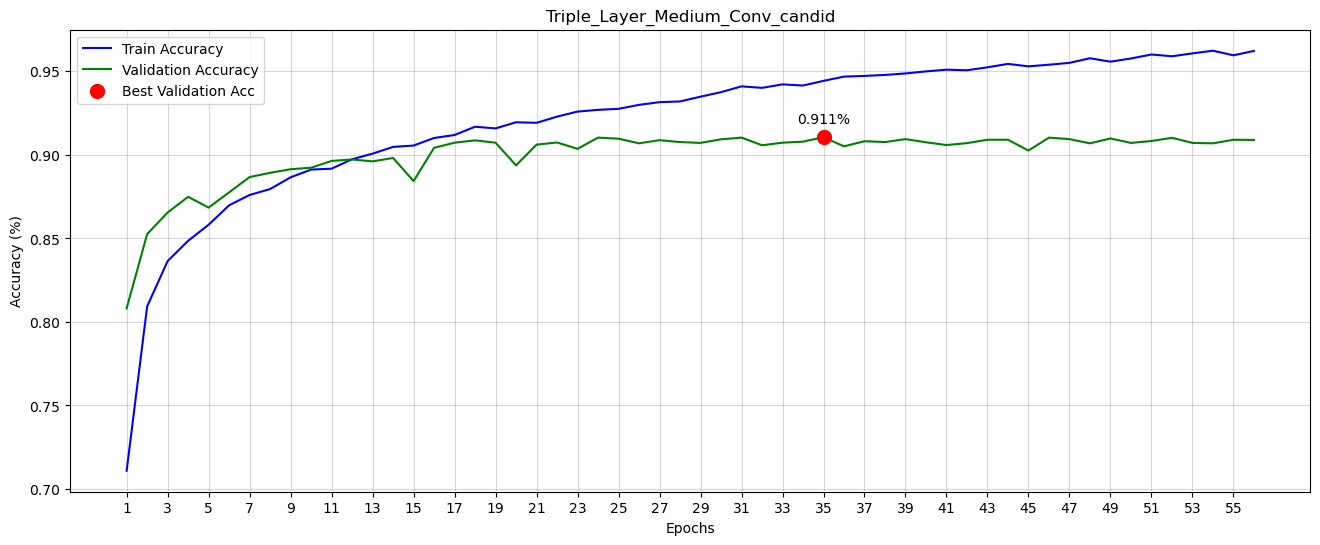

In [245]:
fig1, axs1 = plt.subplots(1, 1, figsize=(16, 6))
plot_accuracies(acc1[1], acc1[2], candid_model1_name, axs1)

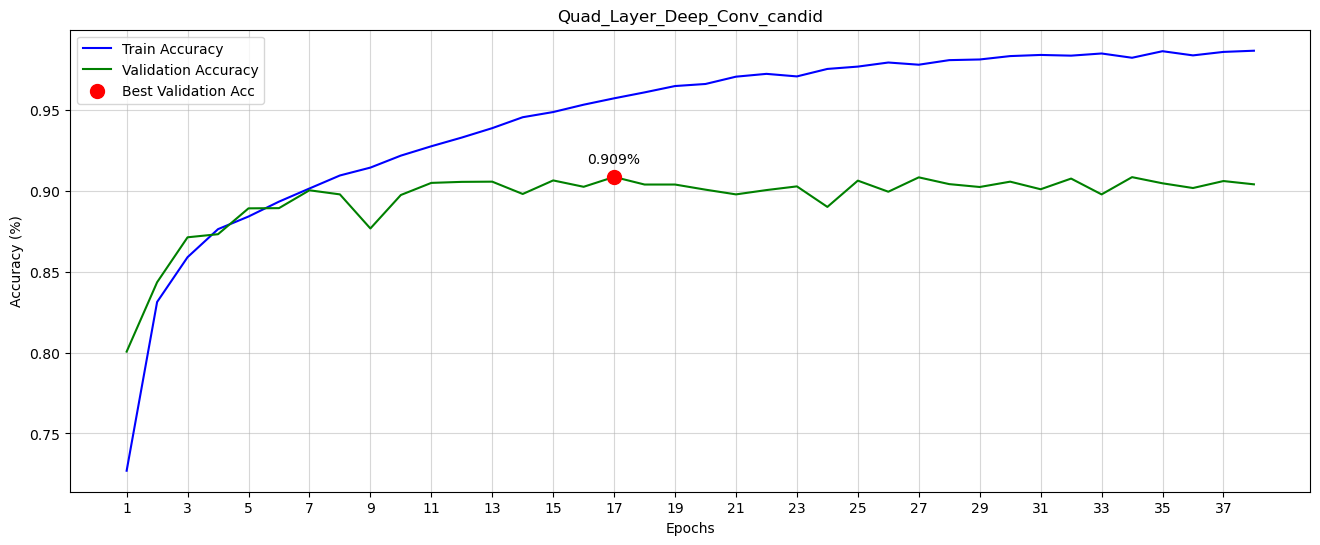

In [246]:
fig2, axs2 = plt.subplots(1, 1, figsize=(16, 6))
plot_accuracies(acc2[1], acc2[2], candid_model2_name, axs2)

In [247]:
candid1.eval()
candid2.eval()

ConvNetDrop(
  (layers): ModuleList(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout): Dropout(p=0.44404064095044543, inplace=False)
  (fc): Linear(in_features=1024, out_features=10, bias=True)
)

In [248]:
predictions1 = []
true_labels1 = []
    
with torch.no_grad():
    for inputs, labels in valid_loader_norm:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = candid1(inputs)
        predicted_labels = outputs.argmax(dim=1)
        predictions1.extend(predicted_labels.cpu().numpy())
        true_labels1.extend(labels.cpu().numpy())

In [249]:
predictions2 = []
true_labels2 = []
    
with torch.no_grad():
    for inputs, labels in valid_loader_norm:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = candid2(inputs)
        predicted_labels = outputs.argmax(dim=1)
        predictions2.extend(predicted_labels.cpu().numpy())
        true_labels2.extend(labels.cpu().numpy())

**Spočtěme si ještě F1 skóre jednotlivých modelů**

In [250]:
from sklearn.metrics import f1_score

In [254]:
f1_candid1 = f1_score(true_labels1, predictions1, average='weighted')
f1_candid2 = f1_score(true_labels2, predictions2, average='weighted')

print(f"F1 Score (Candidate 1): {f1_candid1:.3f}")
print(f"F1 Score (Candidate 2): {f1_candid2:.3f}")

F1 Score (Candidate 1): 0.910
F1 Score (Candidate 2): 0.908


**Na základě F1 skóre a validační přesnosti volme jako finální model `candid1`**

#### Odhadněte, jakou přesnost můžete očekávat na nových datech

In [261]:
testing_loader = loaders['normalized']['test']
test_data = sets['normalized']['test']

In [262]:
tcorrect = 0
for (tinputs, tlabels) in testing_loader:
    tinputs, tlabels = tinputs.to(device), tlabels.to(device)
    with torch.no_grad():
        toutputs = candid1(tinputs)
        tloss = loss_fn(toutputs, tlabels)
        tcorrect += (toutputs.argmax(1) == tlabels).float().sum()
        
tacc = tcorrect / len(test_data)

In [264]:
print(f'Odhad přesnosti na testovacích datech: {tacc:.3f}')

Odhad přesnosti na testovacích datech: 0.903


### Nakonec načtěte vyhodnocovací data a proveďte predikce

In [265]:
eval_data = pd.read_csv('./evaluate.csv')

In [266]:
eval_data.head()

,ID,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
X_eval = eval_data.iloc[:, 1:].values.reshape(-1, 1, 32, 32)
ids = eval_data['ID'].values

print(X_eval.shape)

X_eval_tensor = torch.tensor(X_eval, dtype=torch.float)
X_eval_tensor_normalized = (X_eval_tensor / 255.0)

eval_dataset = TensorDataset(X_eval_tensor_normalized)
eval_loader = DataLoader(eval_dataset, batch_size=64, shuffle=False)

(17500, 1, 32, 32)


In [281]:
candid1.eval()
predictions = []

with torch.no_grad():
    for inputs in eval_loader:
        inputs = inputs[0].to(device)
        outputs = candid1(inputs)
        predicted_labels = outputs.argmax(dim=1)
        predictions.extend(predicted_labels.cpu().numpy())

results_df = pd.DataFrame({'ID': ids, 'Label': predictions})
results_df.to_csv('results.csv', index=False)